Loaded reference wavenumber axis: 225 points
Wavenumber range: 1525.8 to 1749.8 cm⁻¹

Found 9 CSV files to process

--- Processing: GVGn1_G3_50mgmL_phos_150mM_pH1_basecorr.CSV (G3) ---
  Loaded data: 721 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


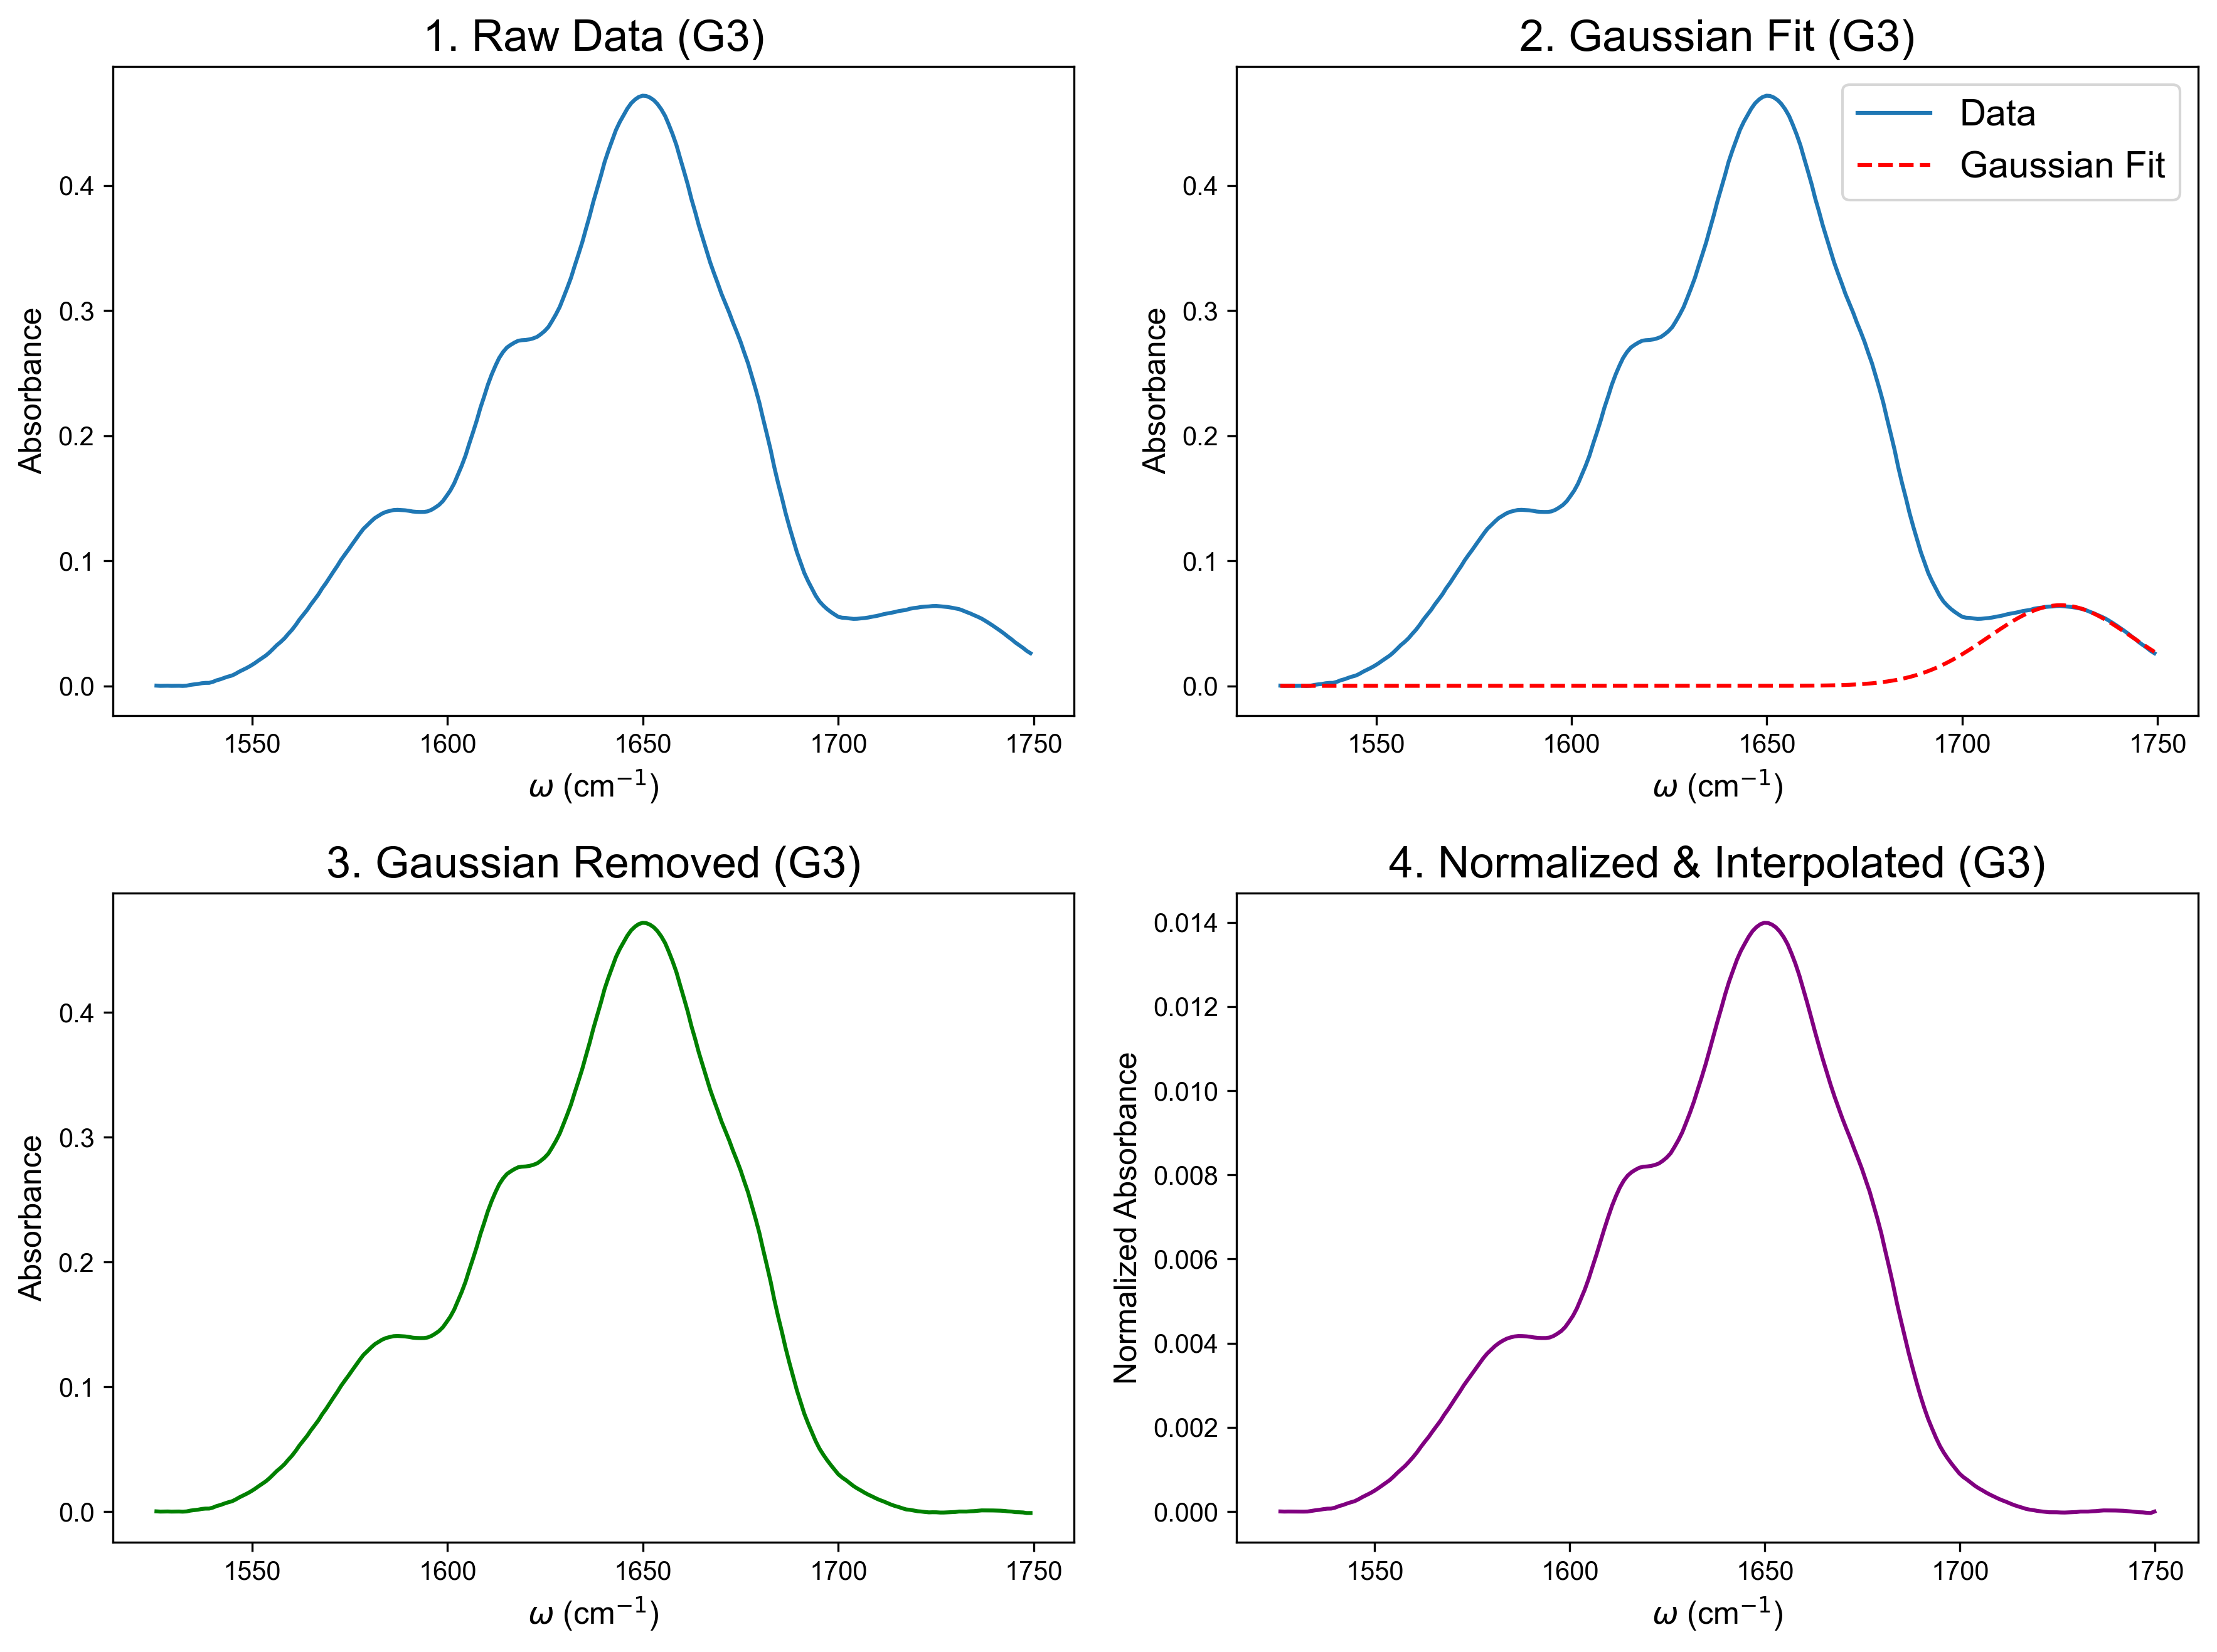

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_G3_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_G3dag_50mgmL_phos_150mM_pH1_basecorr.CSV (G3+) ---
  Loaded data: 721 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


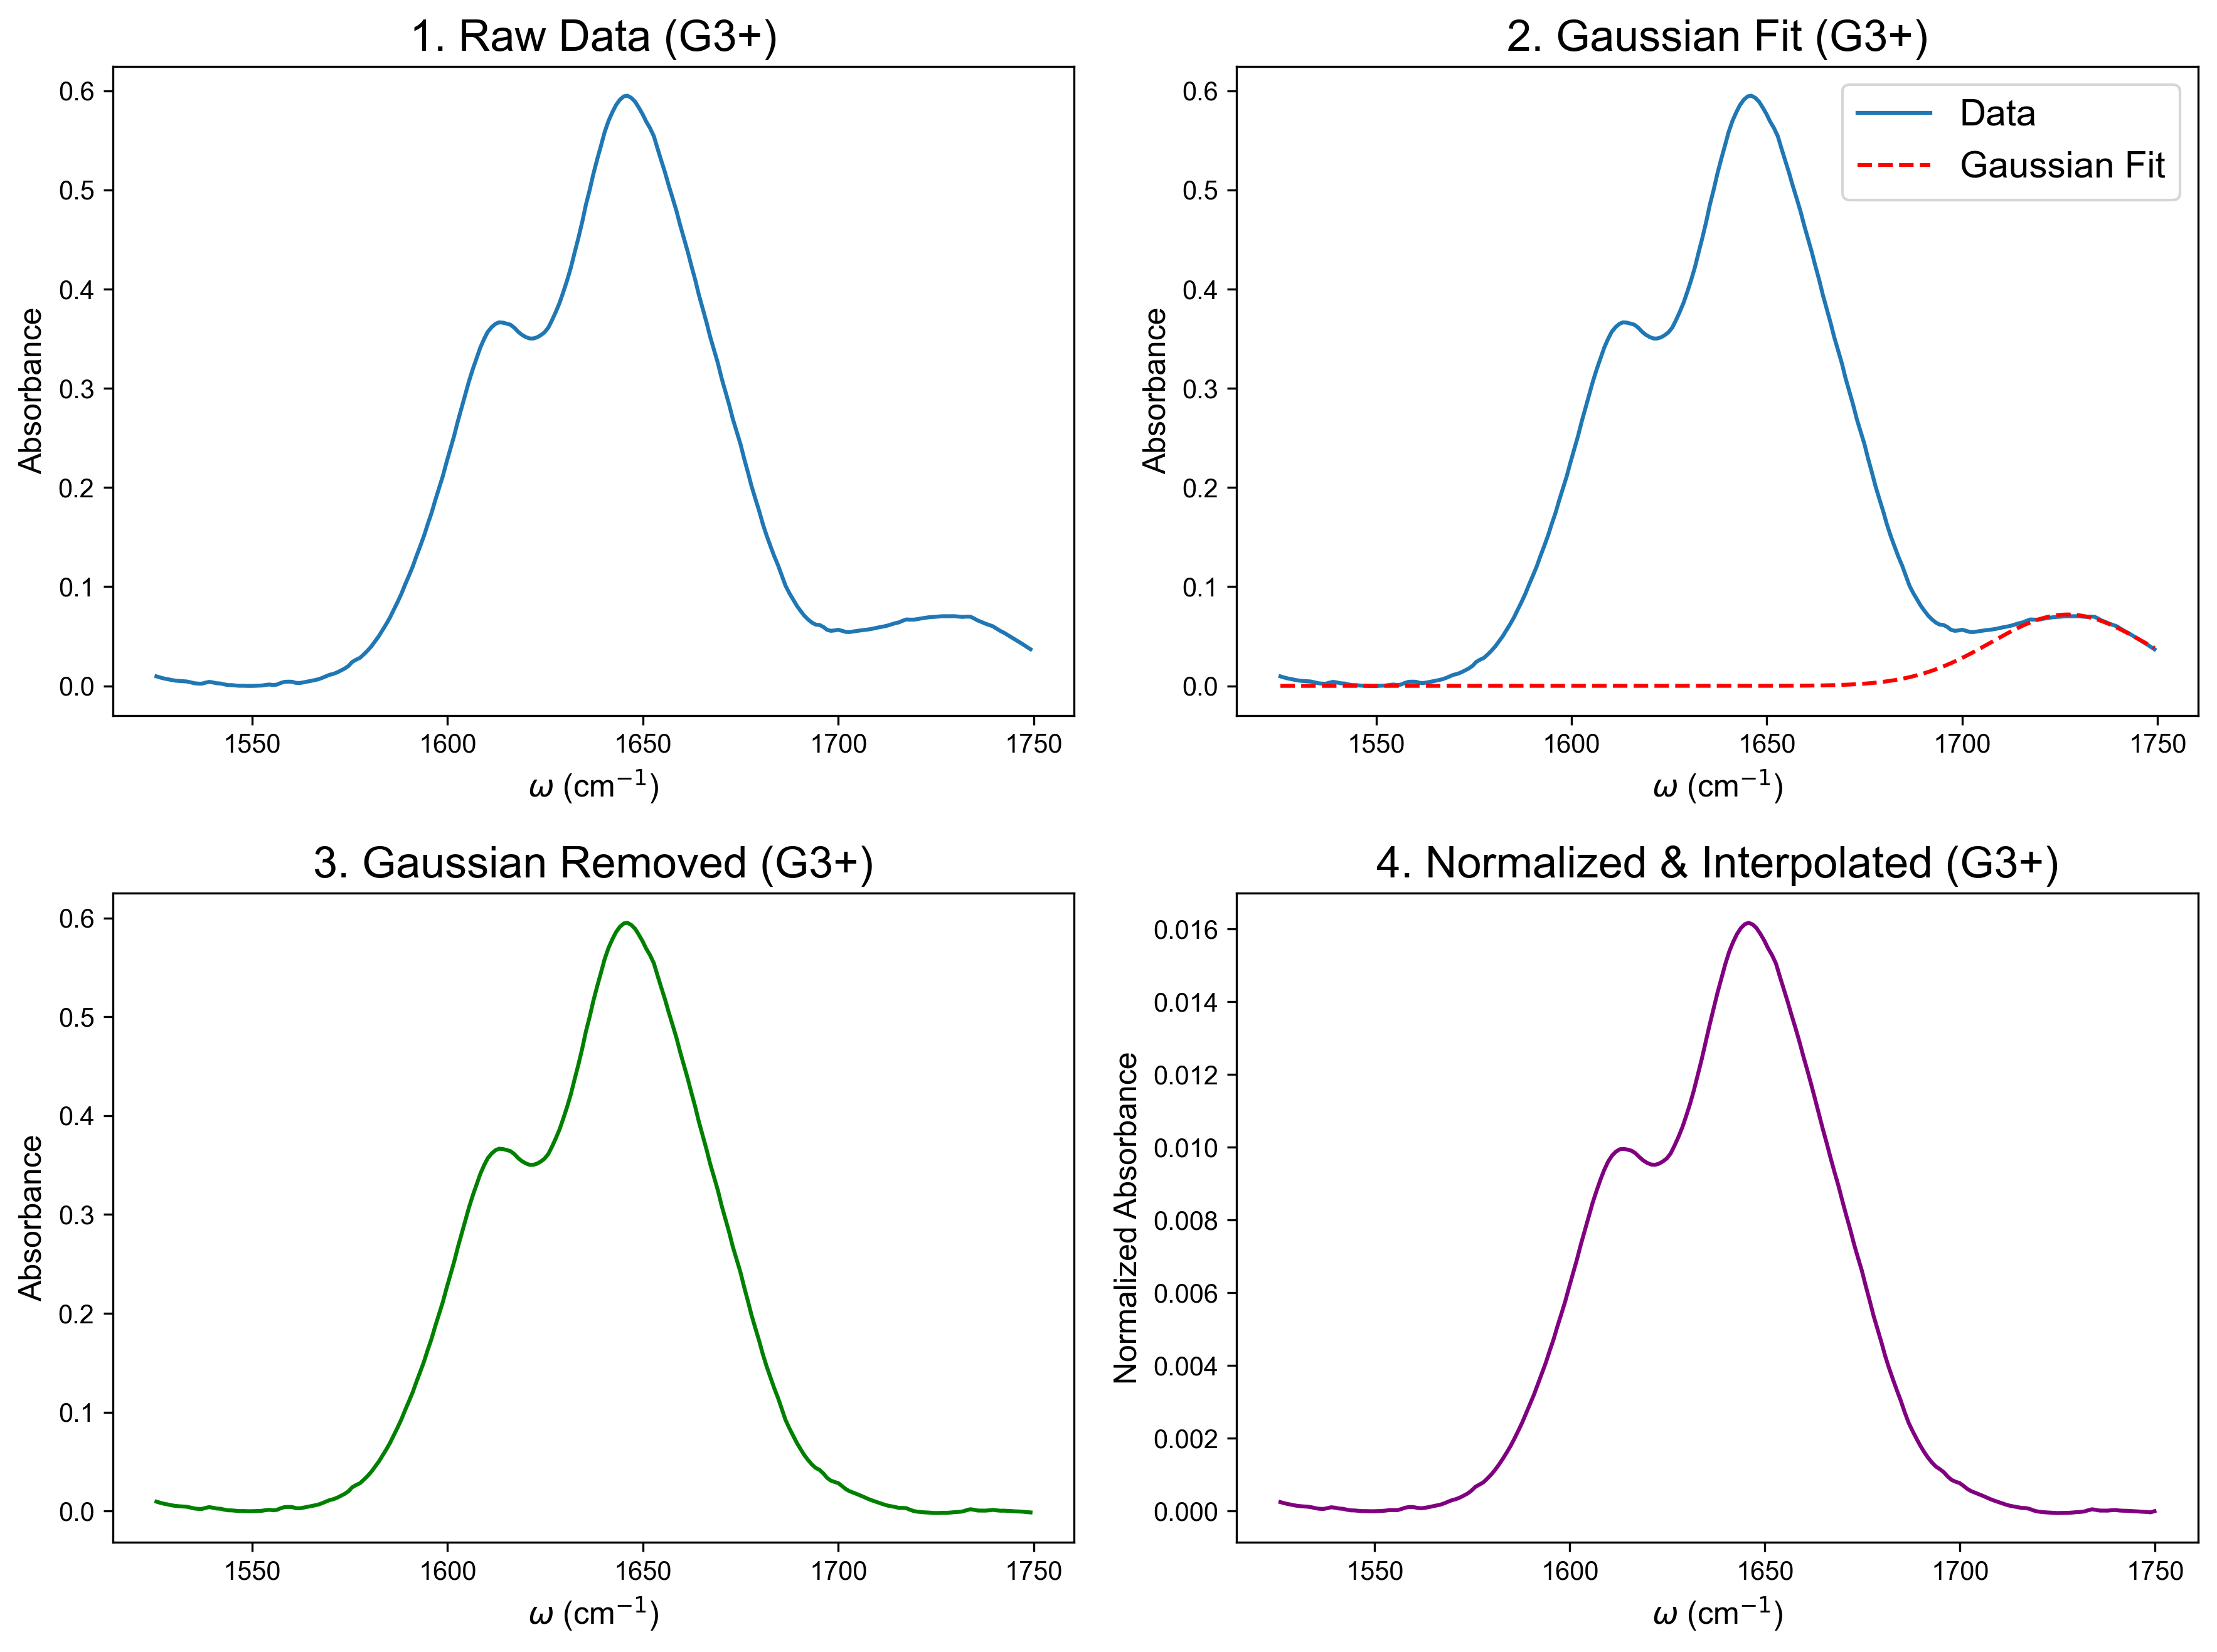

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_G3dag_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_G5dagG3_50mgmL_phos_150mM_pH1_basecorr.CSV (G5+G3) ---
  Loaded data: 721 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


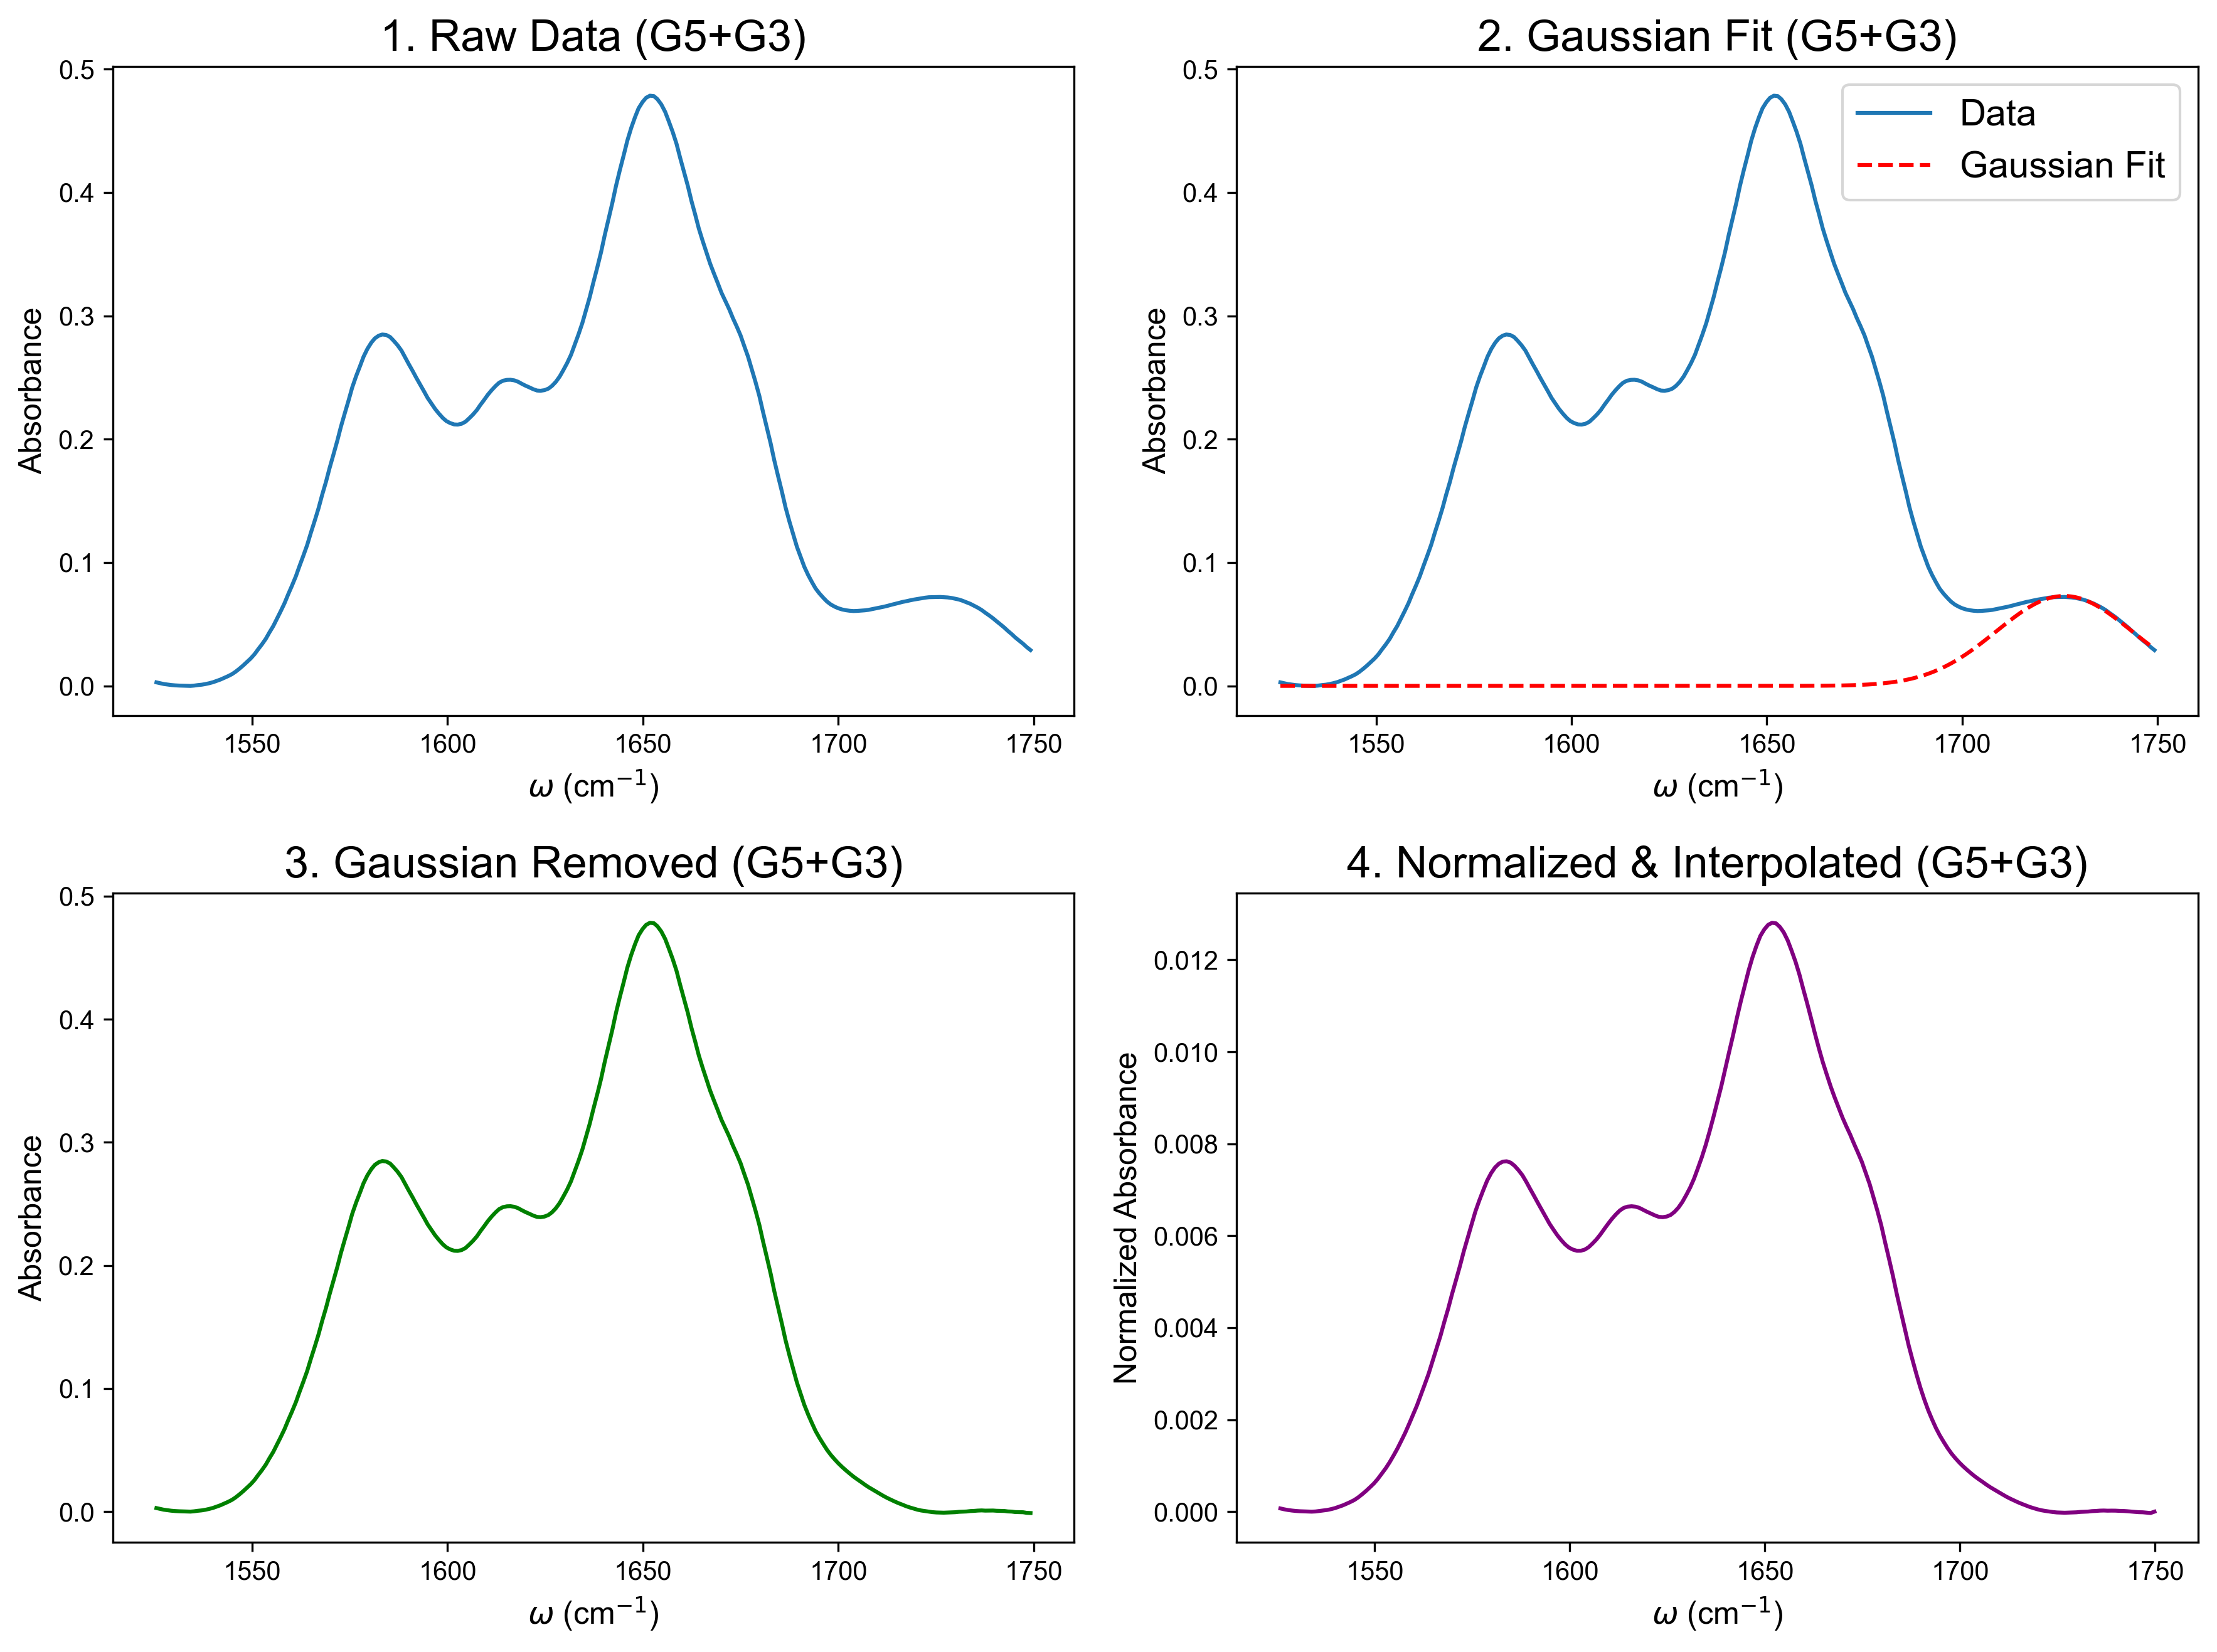

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_G5dagG3_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_G5dag_50mgmL_phos_150mM_pH1_basecorr.CSV (G5+) ---
  Loaded data: 721 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


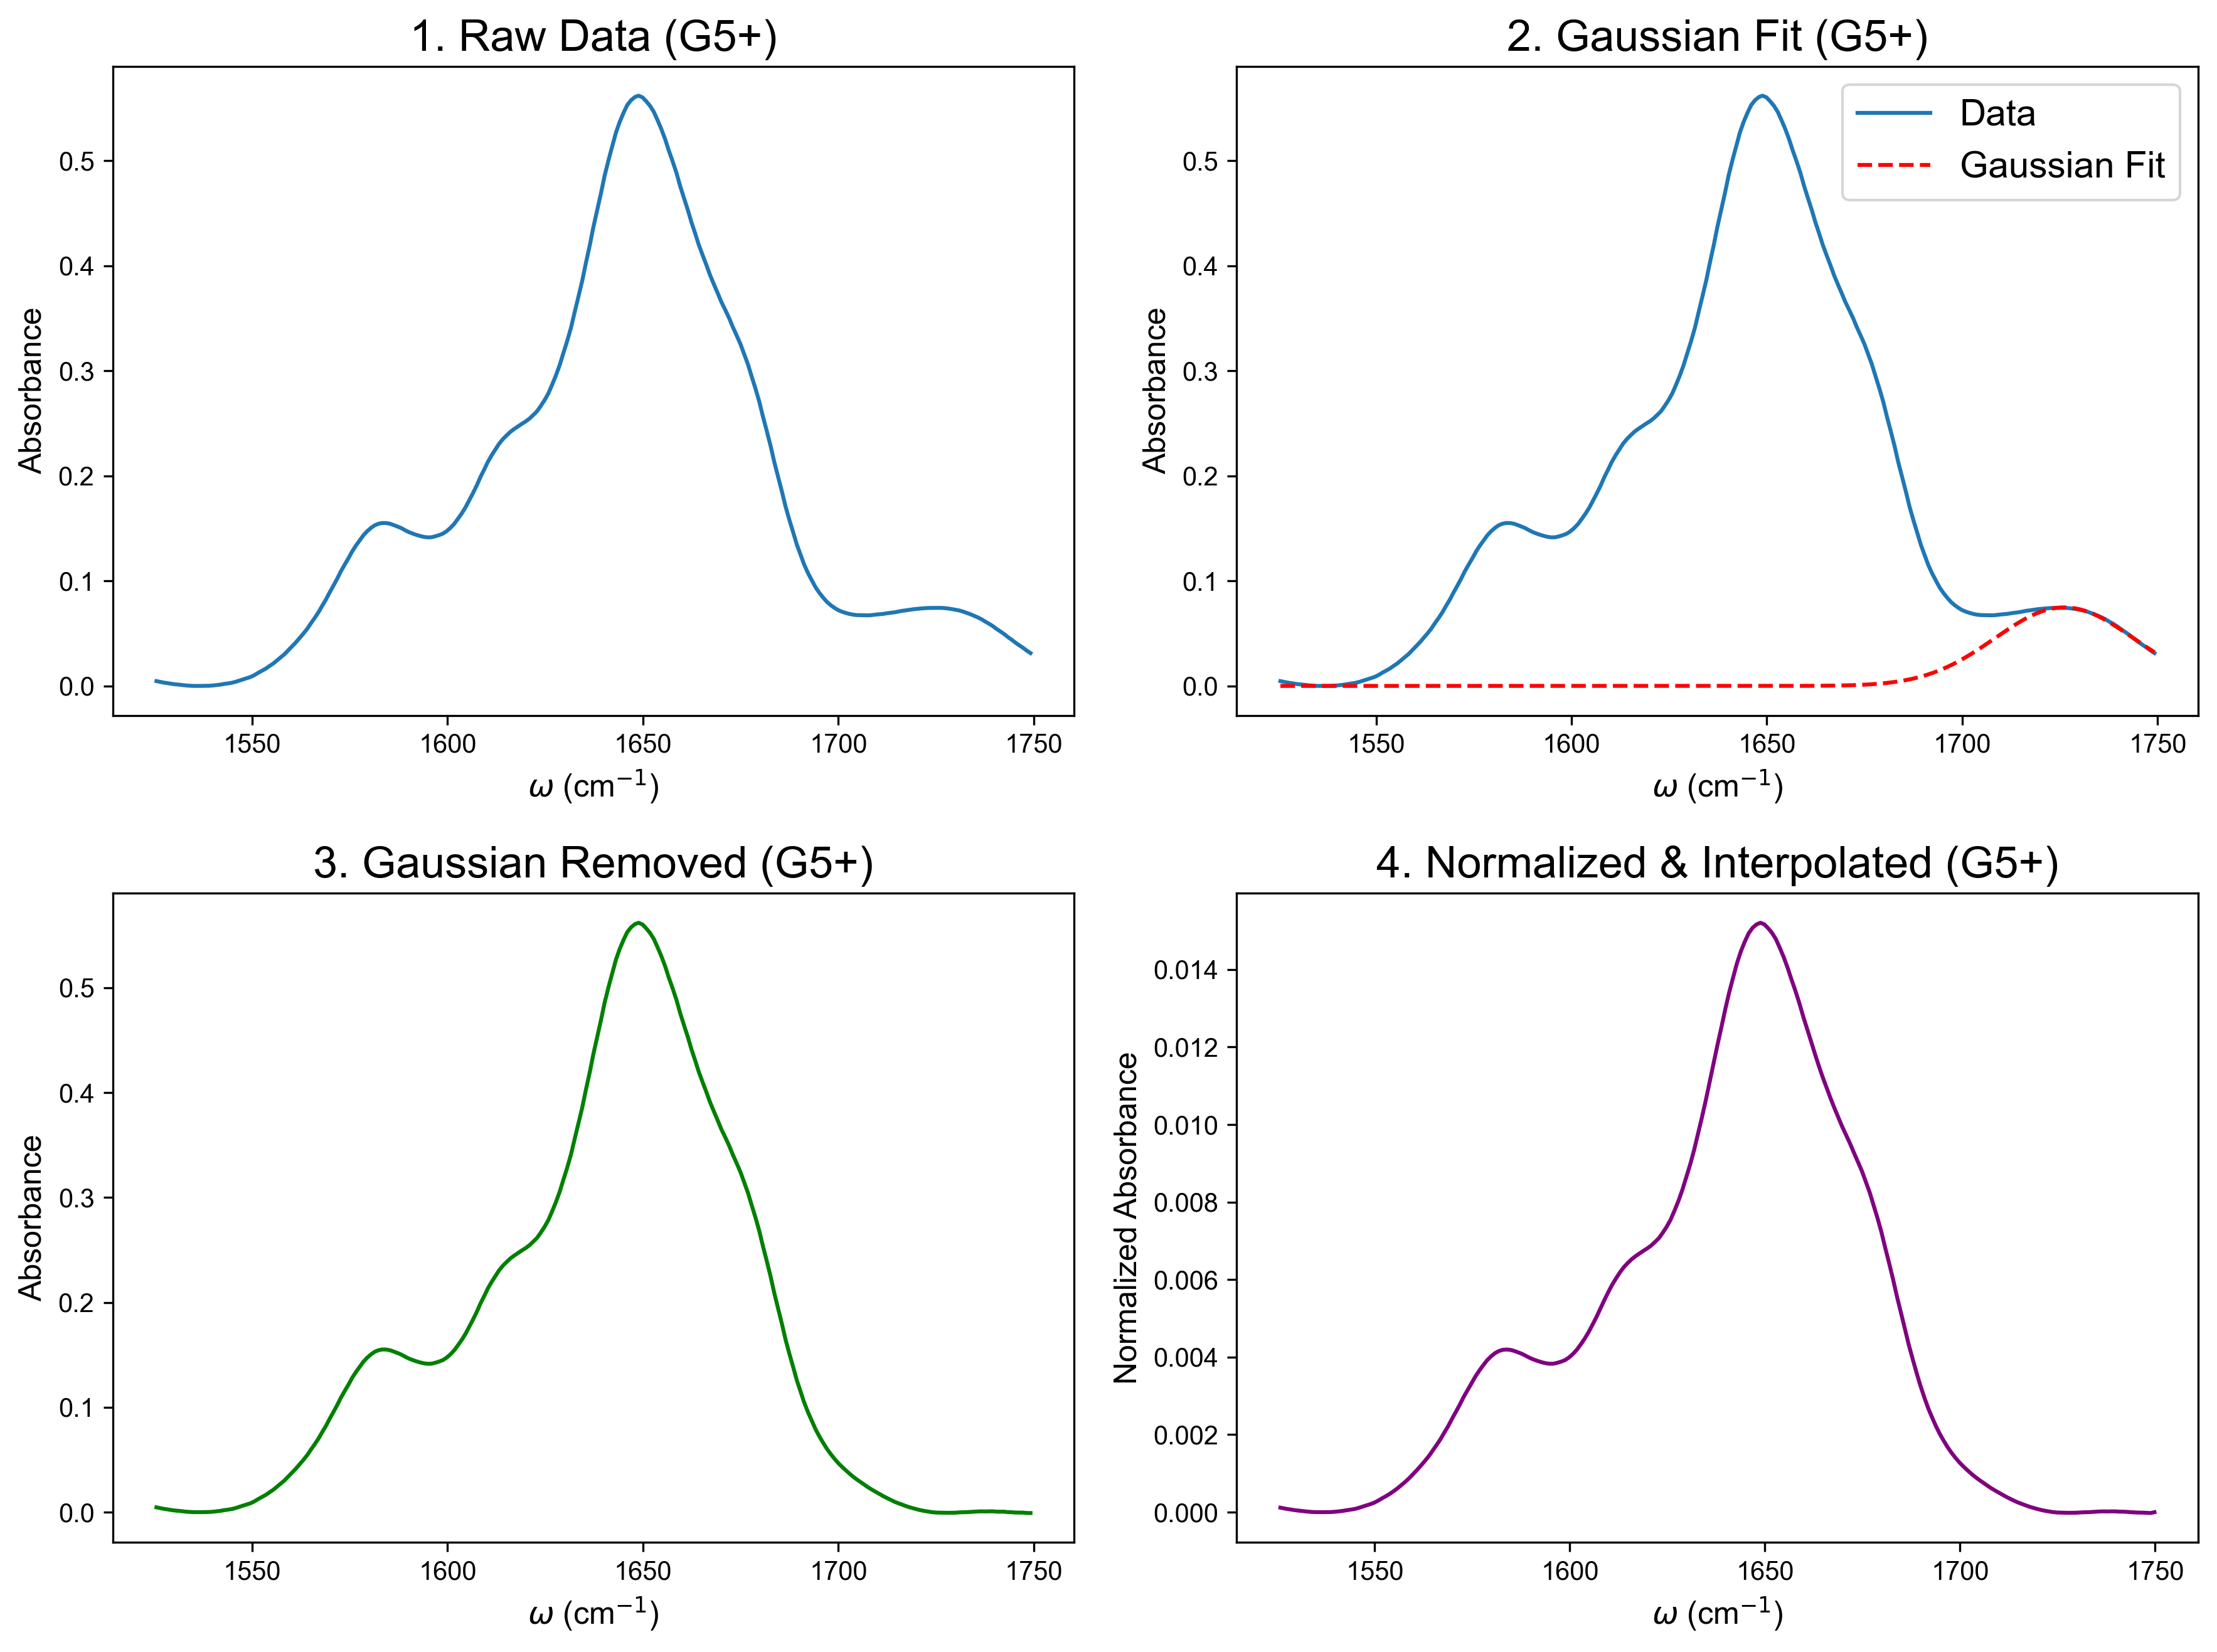

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_G5dag_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_V1G3V4_50mgmL_phos_150mM_pH1_basecorr.CSV (V1G3V4) ---
  Loaded data: 721 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


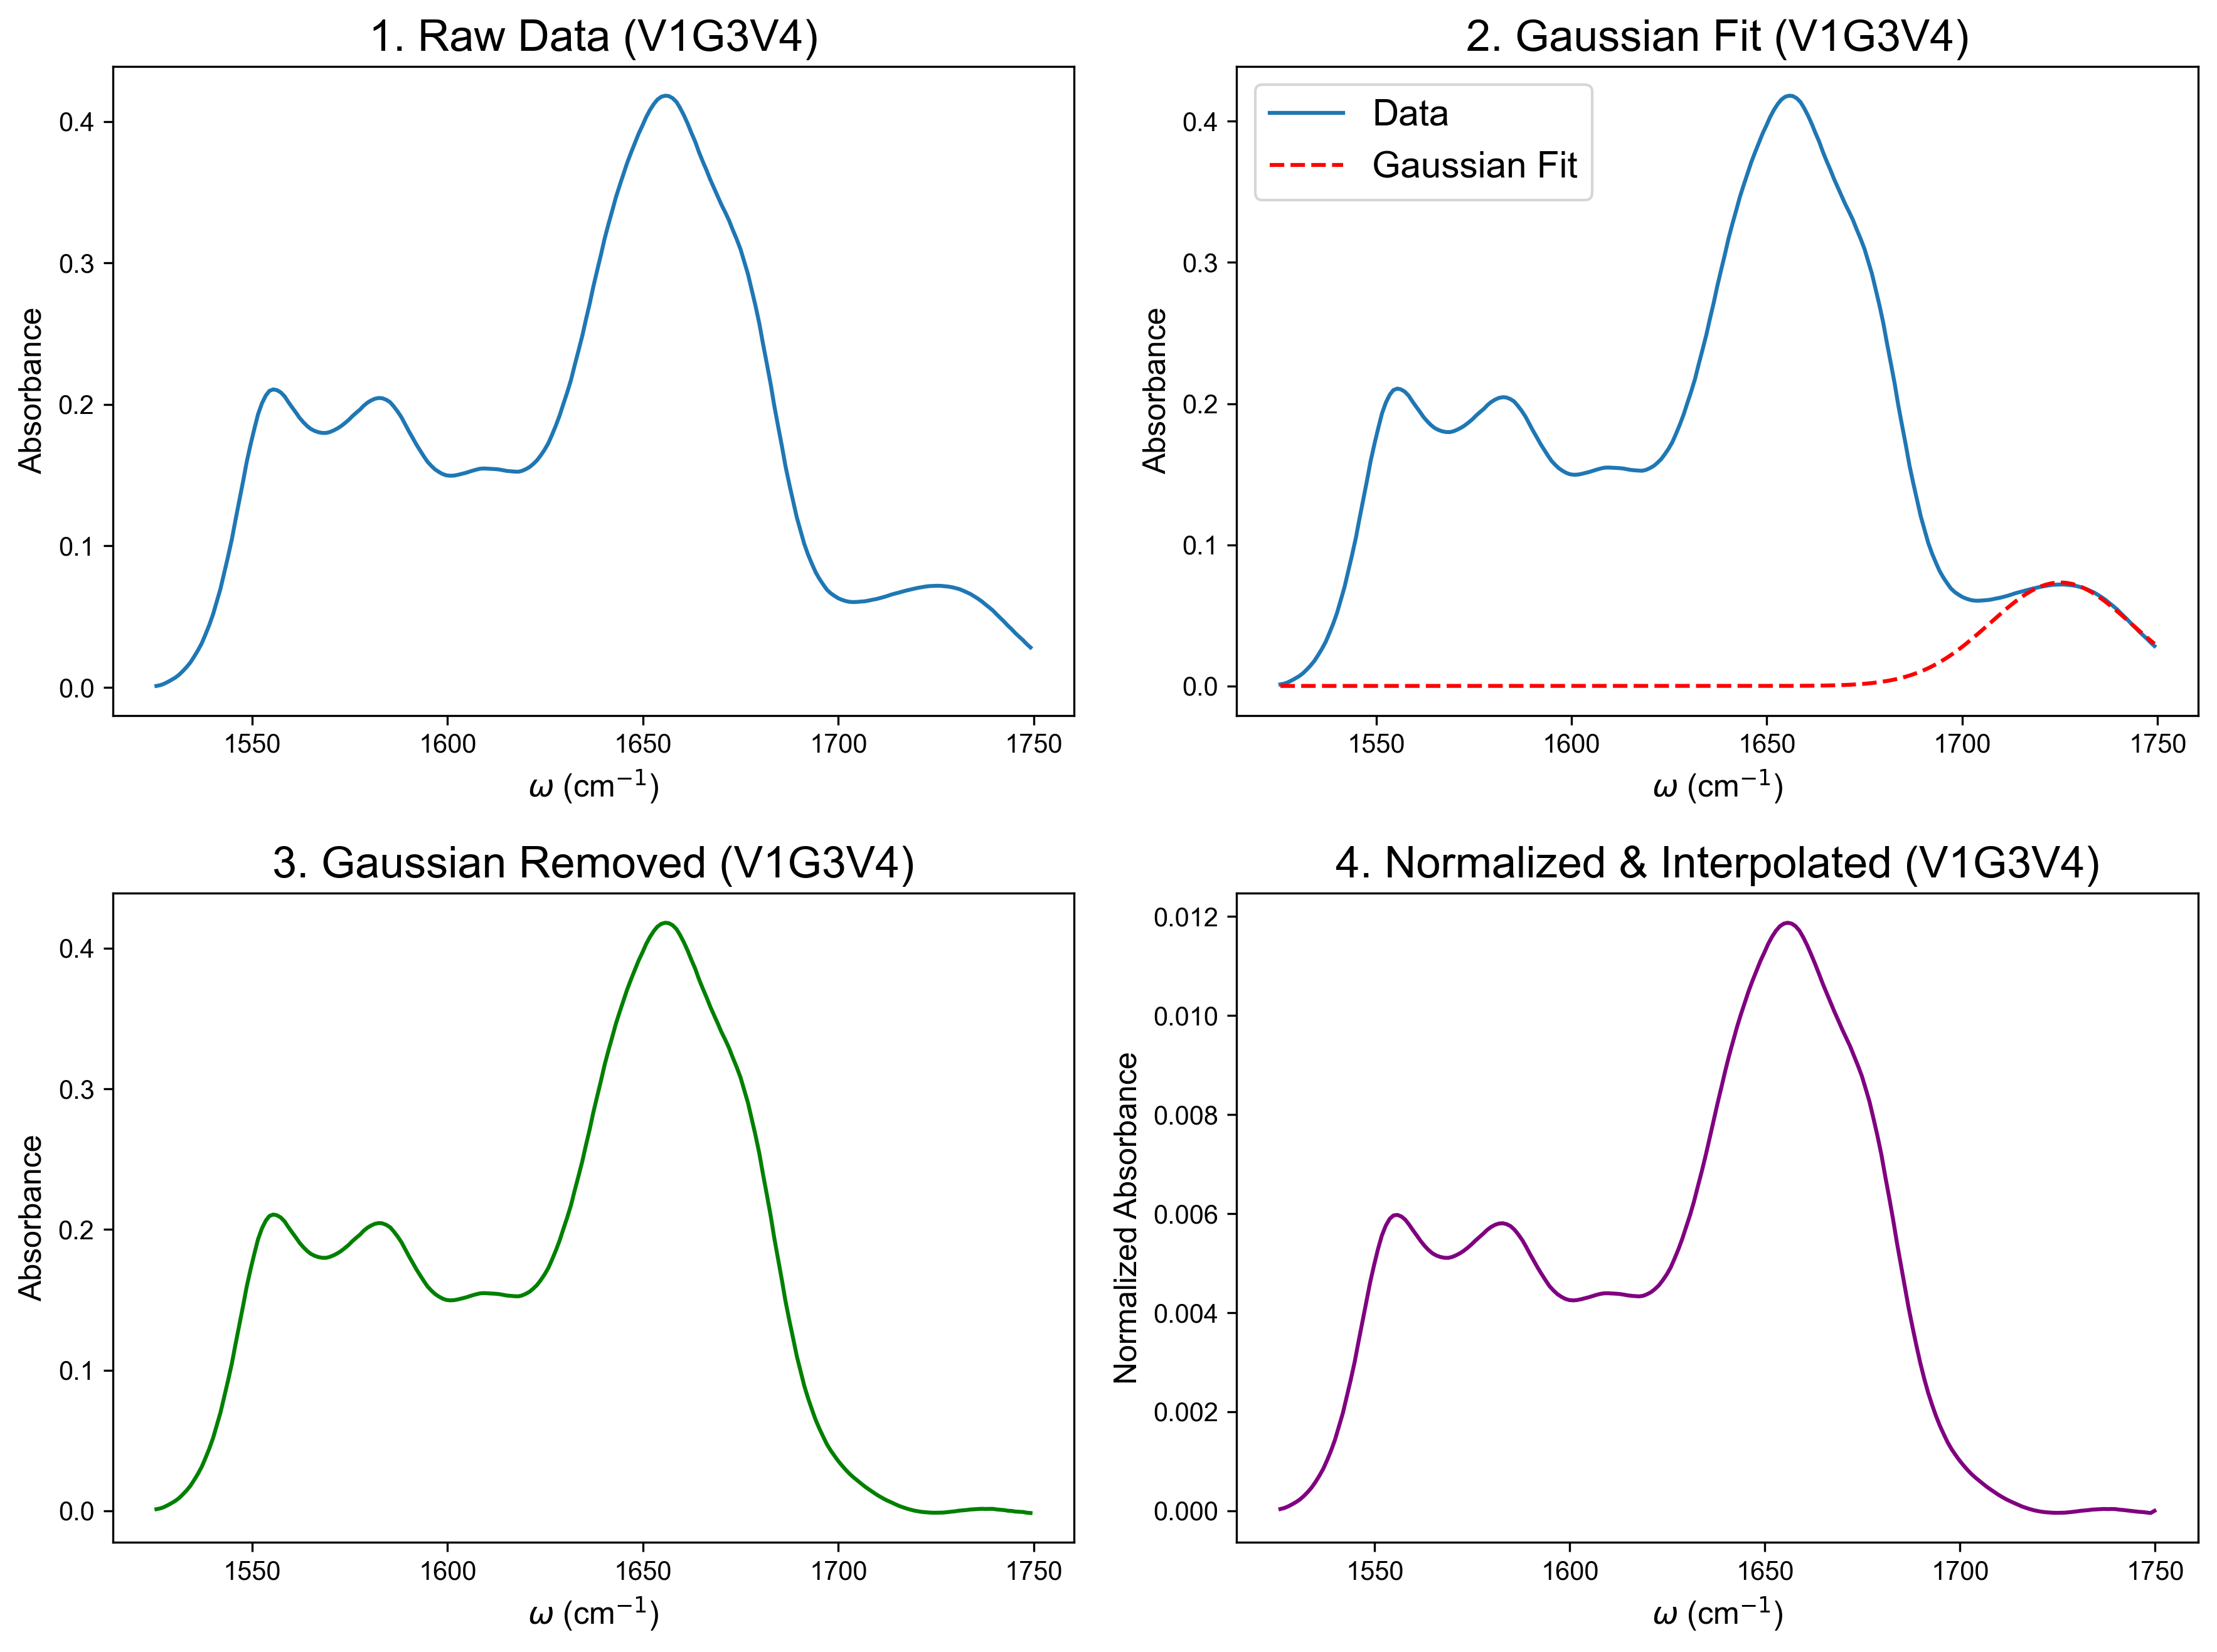

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_V1G3V4_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_V1V4_50mgmL_phos_150mM_pH1_basecorr.CSV (V1V4) ---
  Loaded data: 721 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


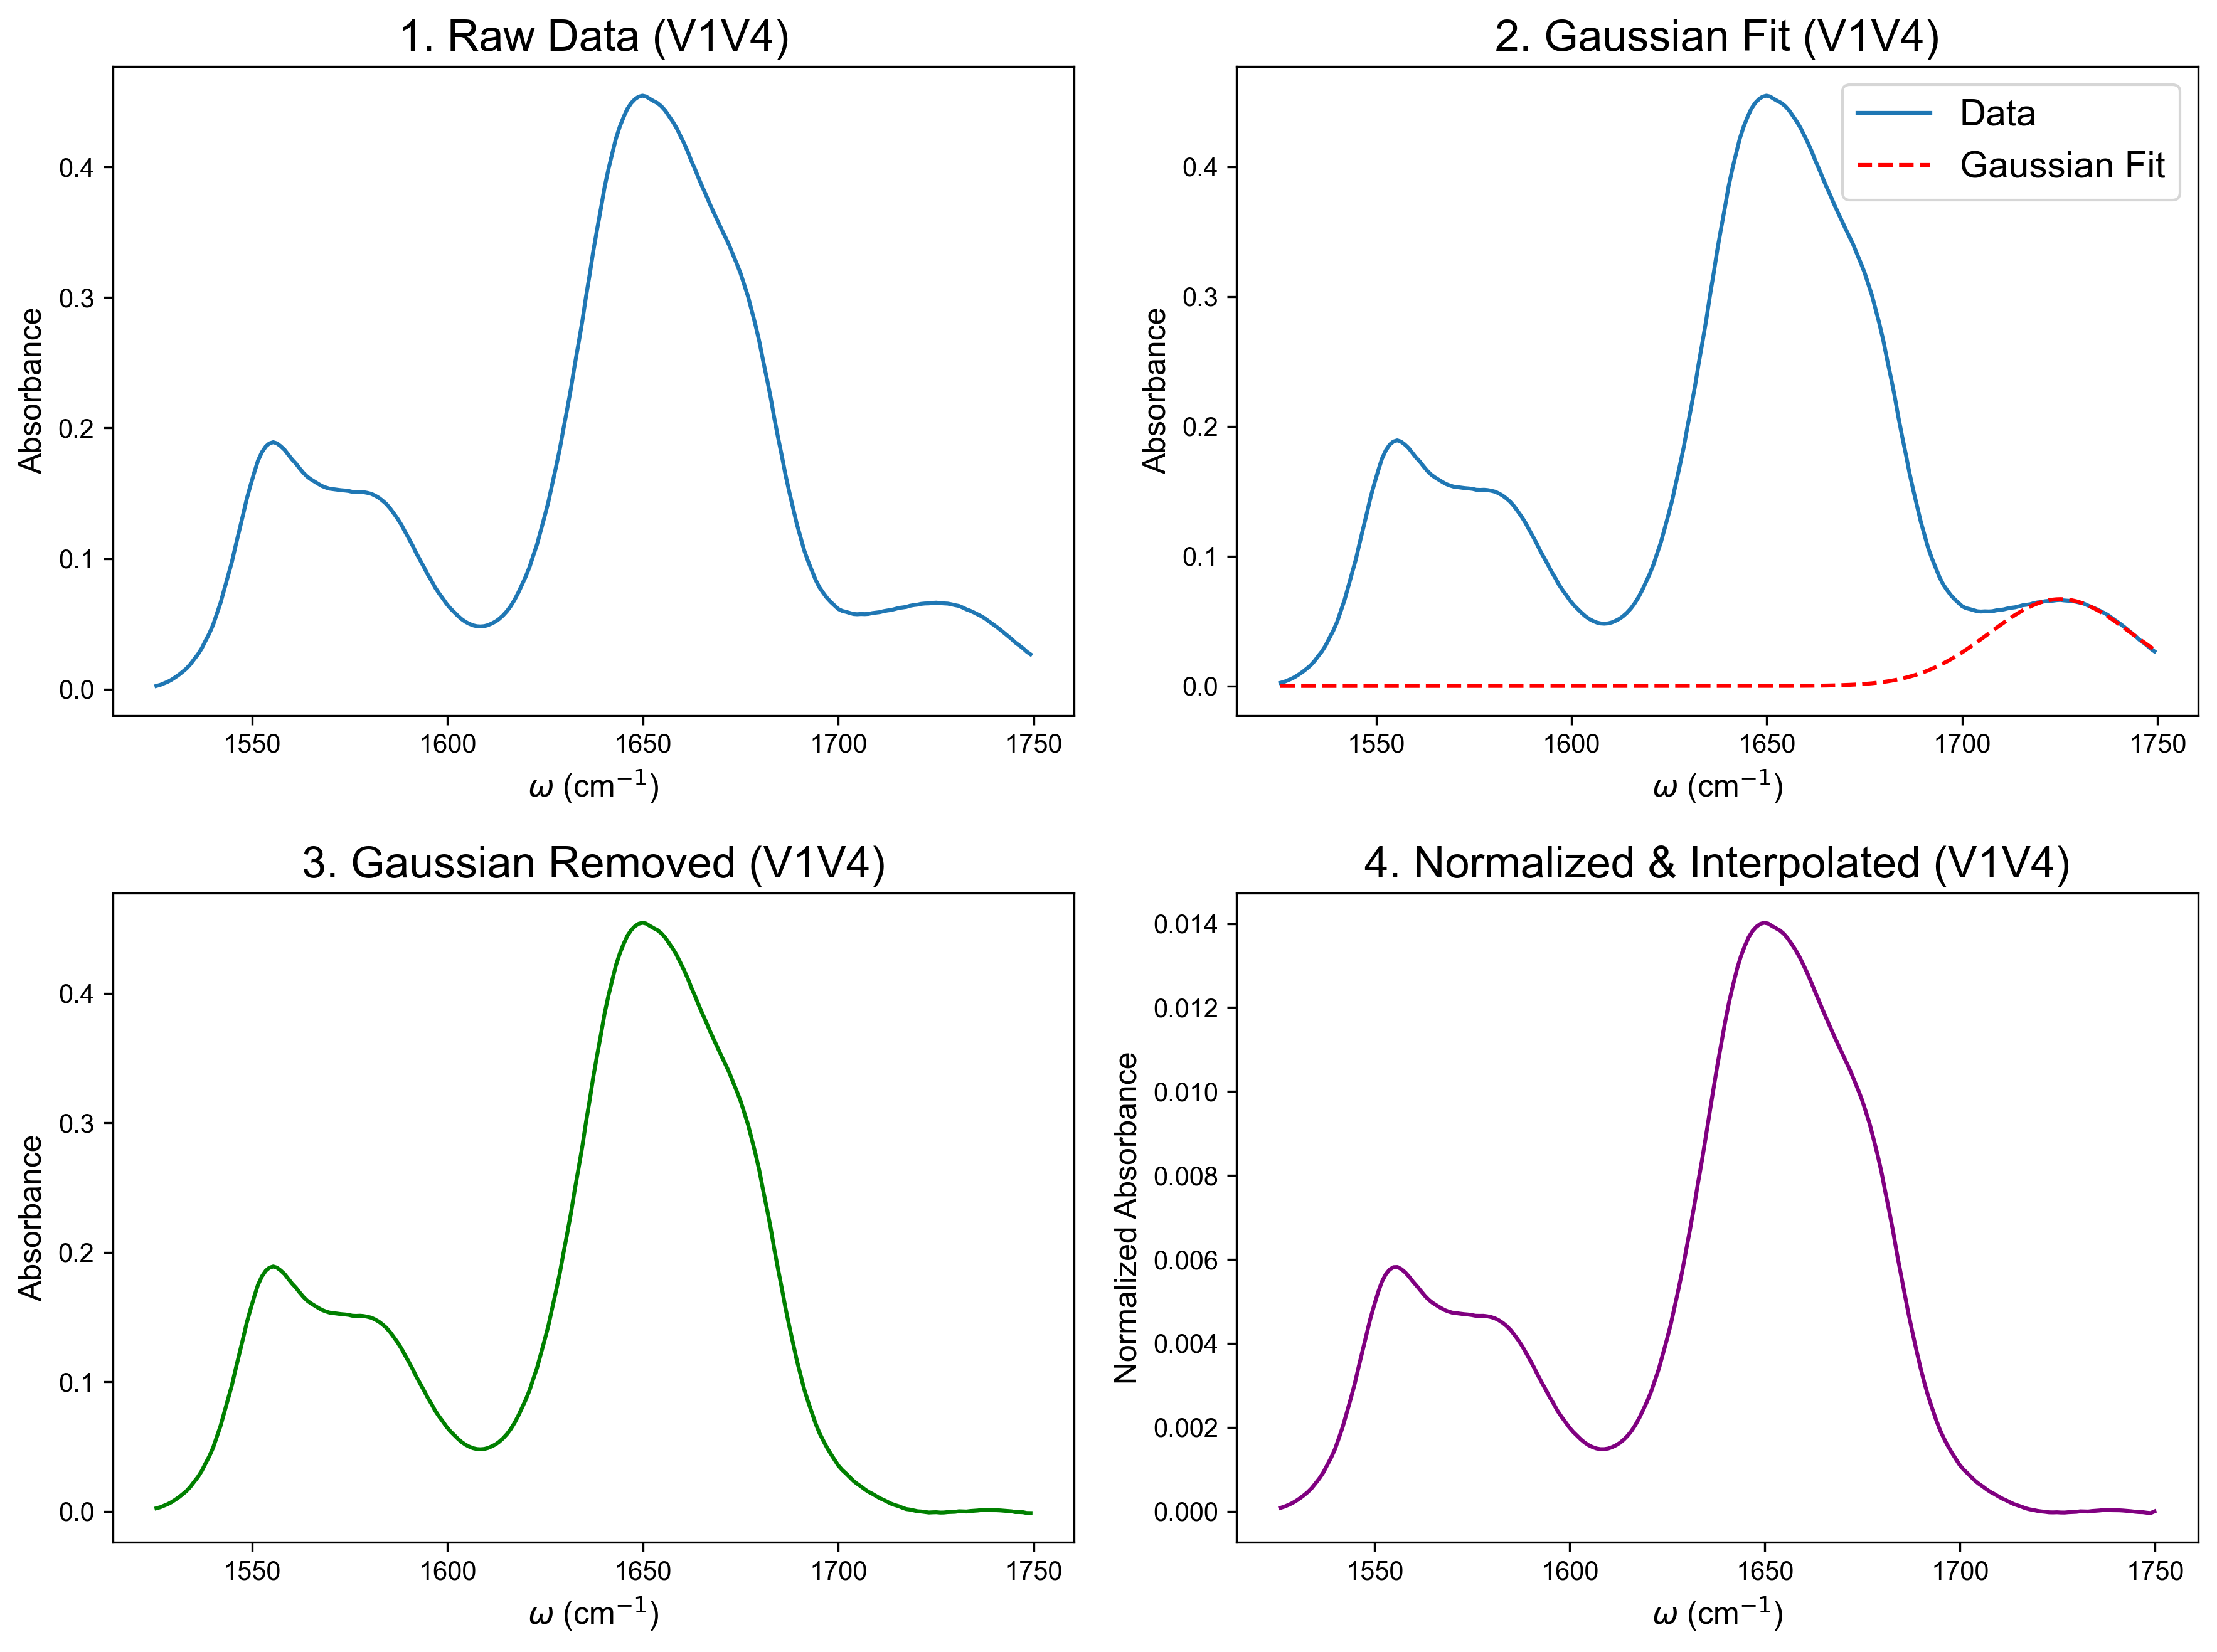

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_V1V4_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_V1_50mgmL_phos_150mM_pH1_basecorr.CSV (V1) ---
  Loaded data: 528 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


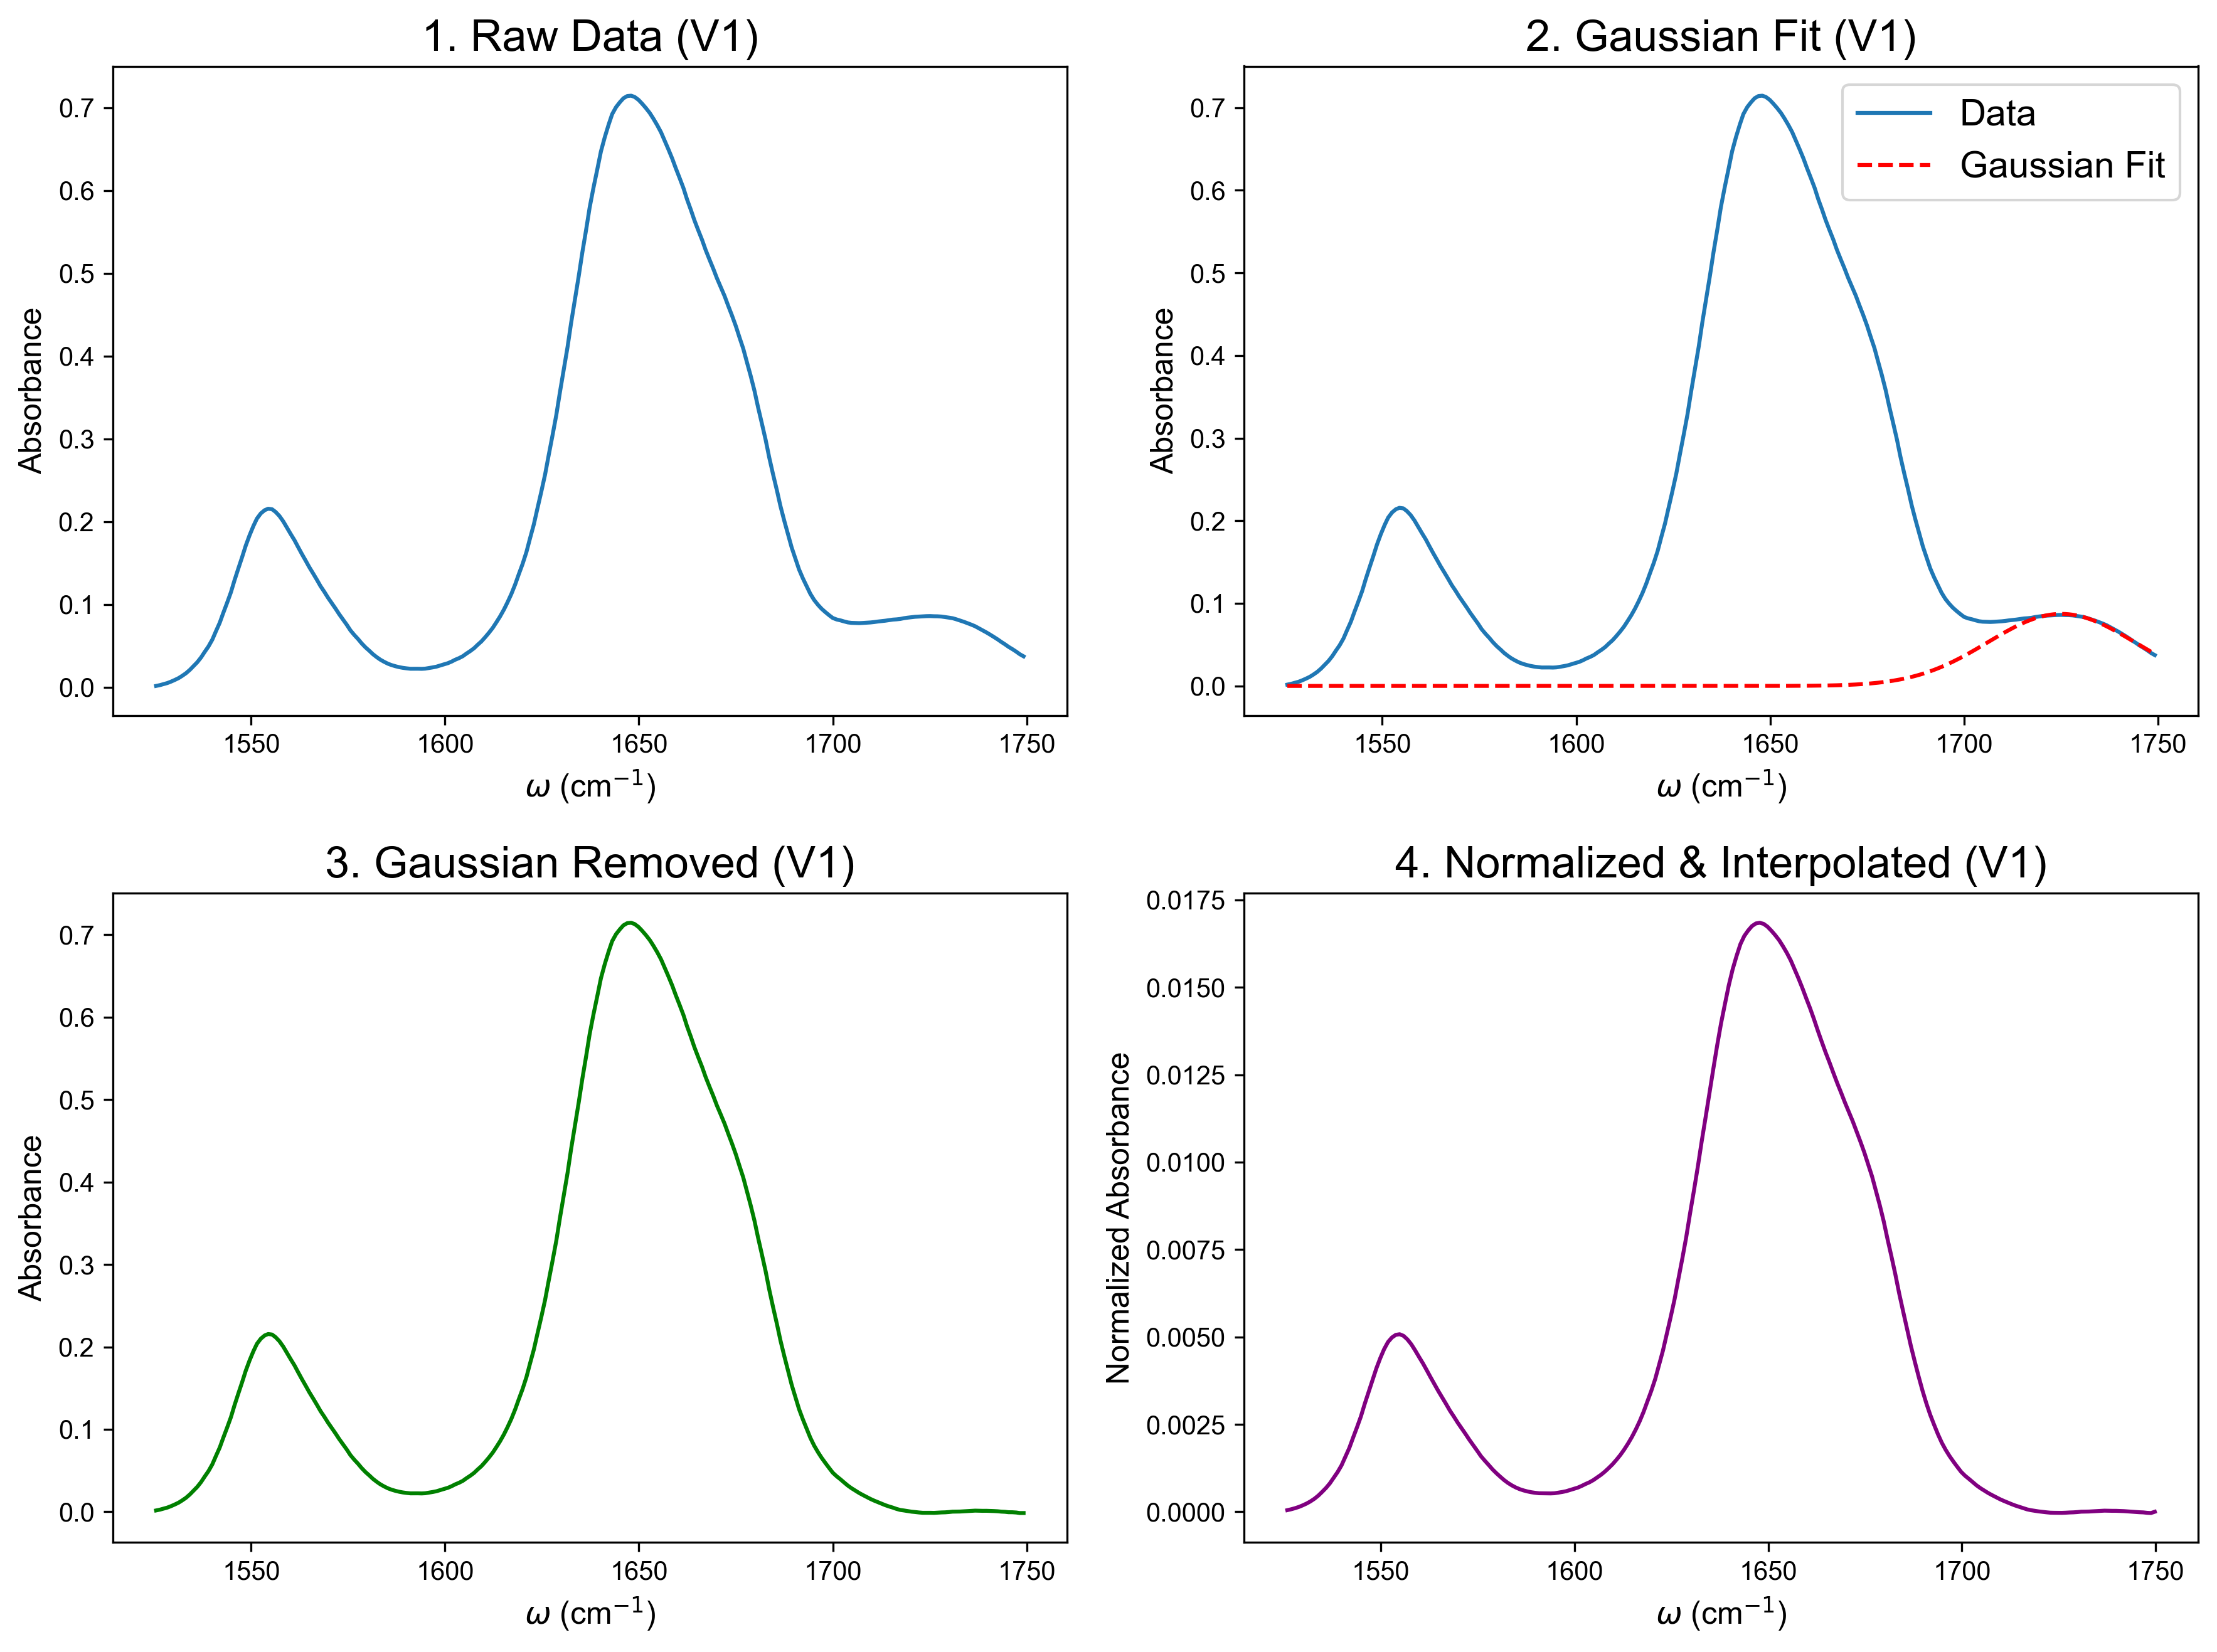

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_V1_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_V4_50mgmL_phos_150mM_pH1_basecorr.CSV (V4) ---
  Loaded data: 721 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


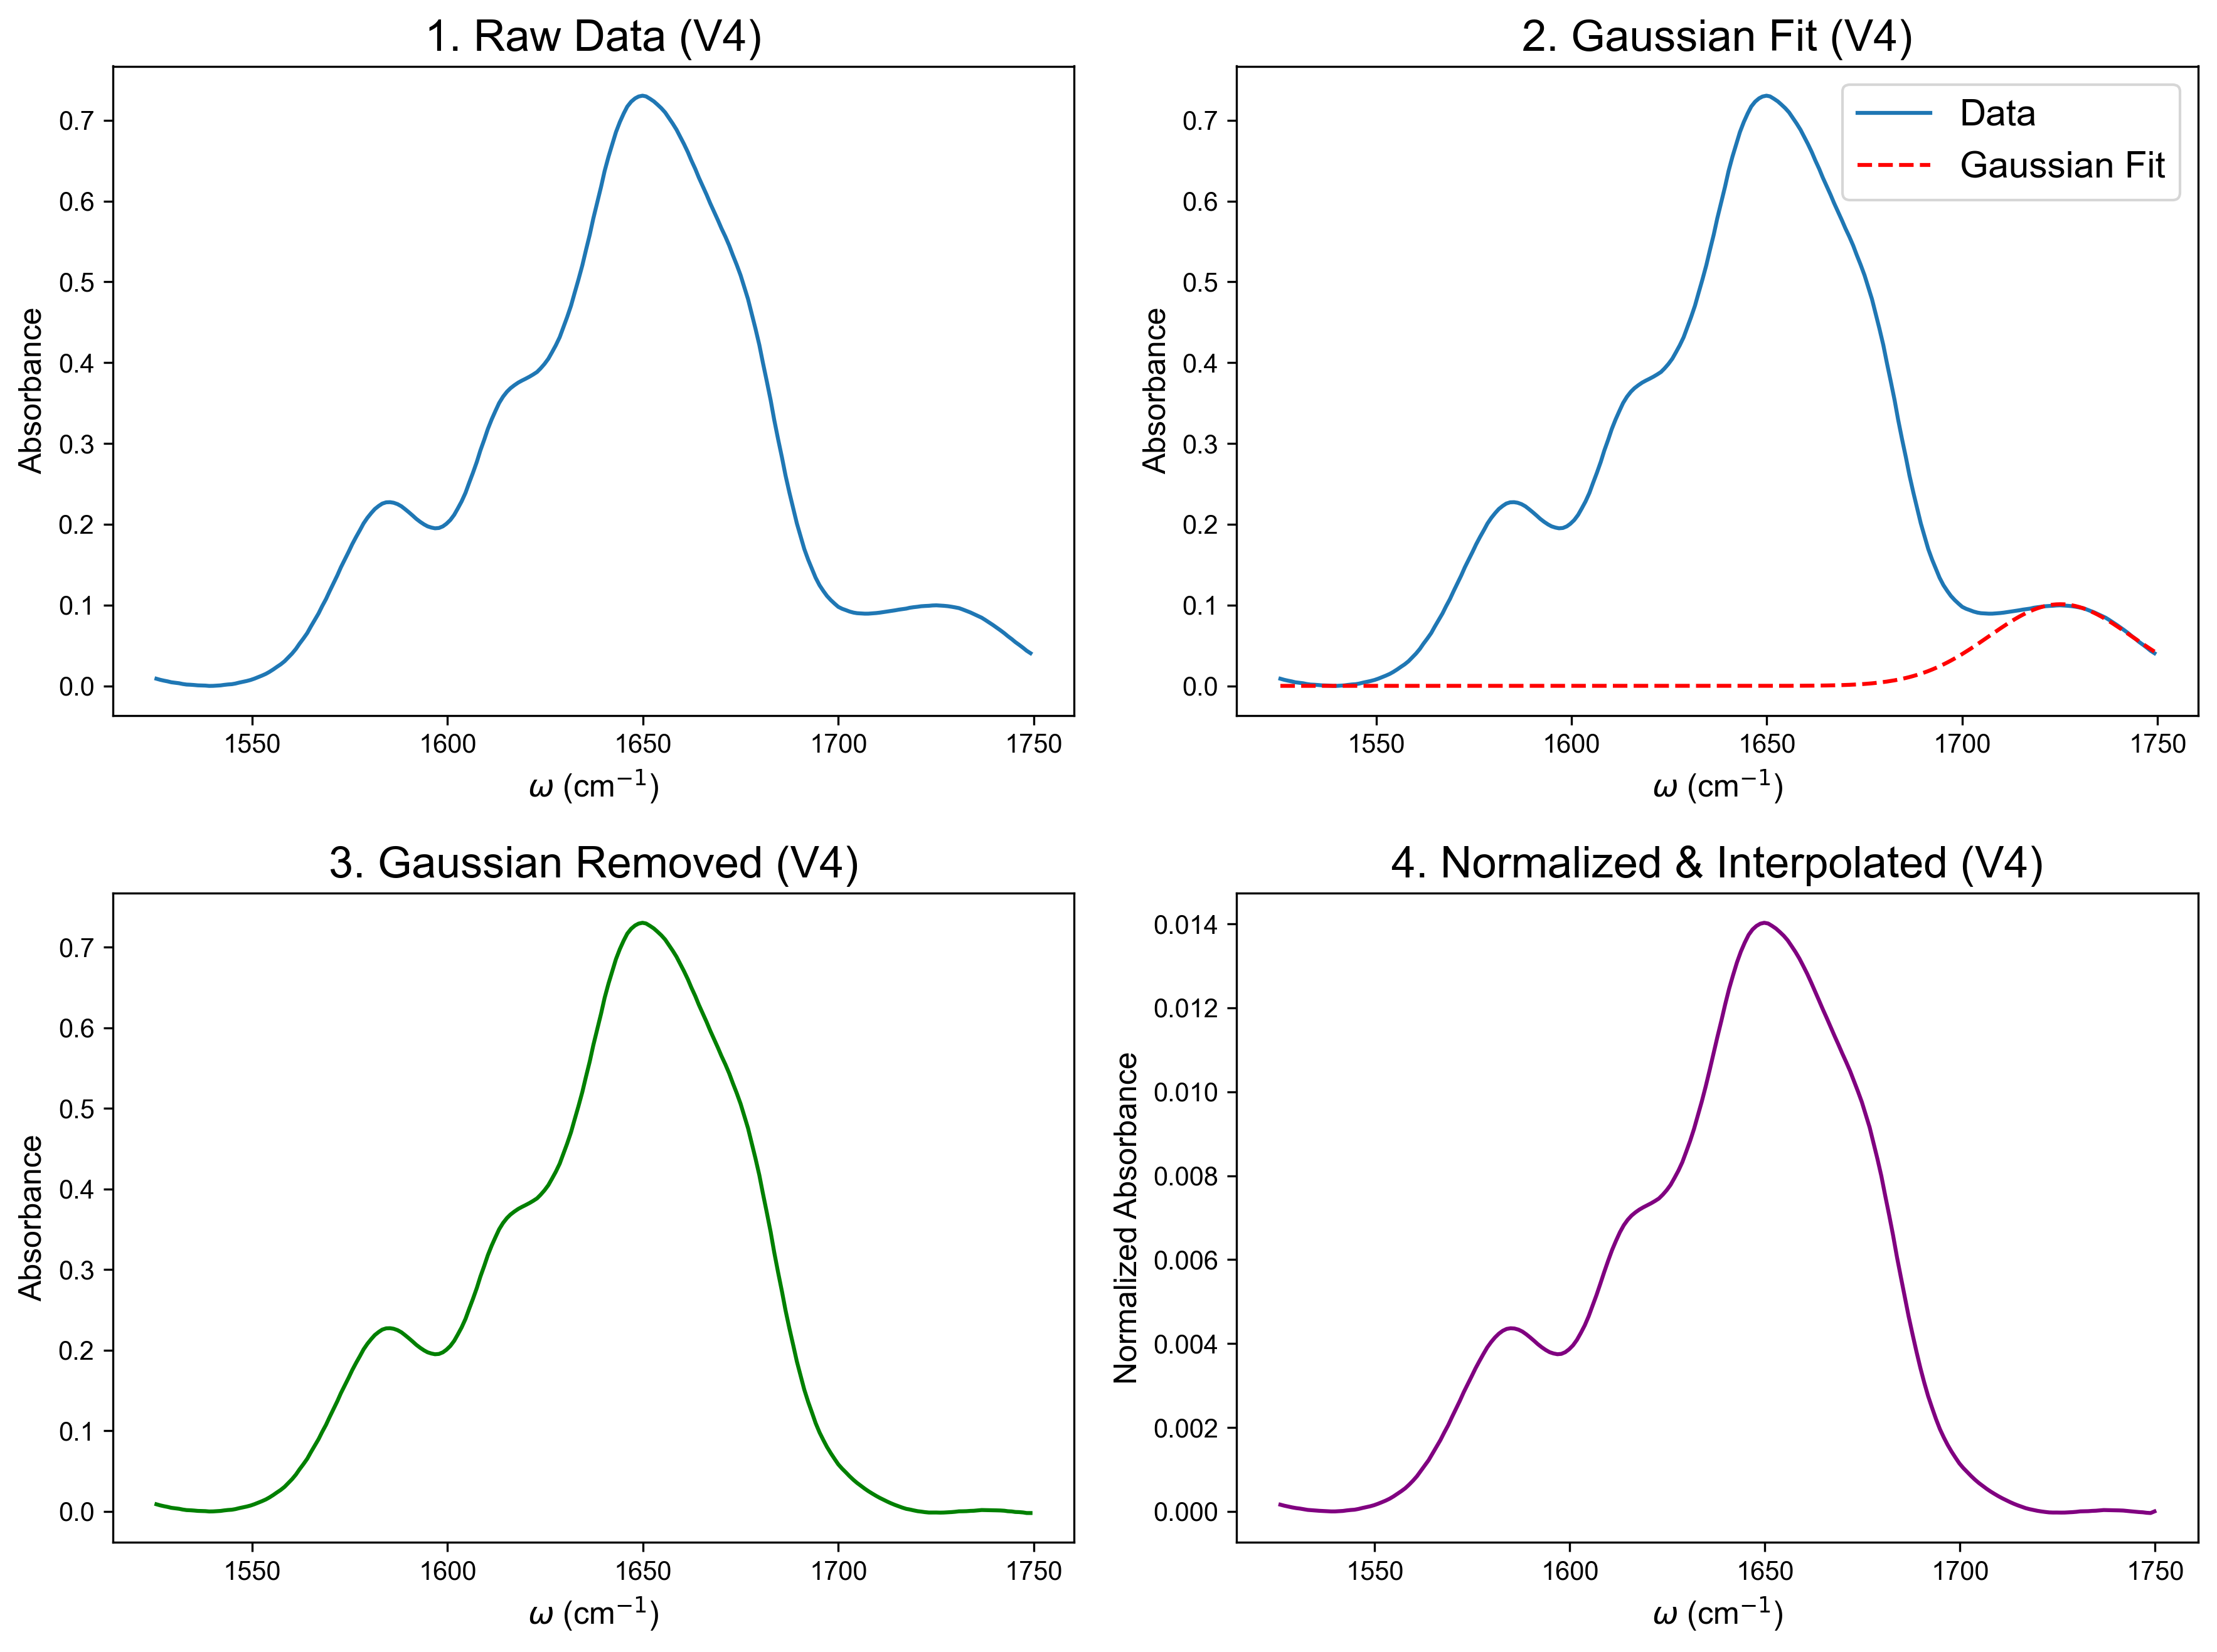

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_V4_50mgmL_phos_150mM_pH1_basecorr_processed.npy

--- Processing: GVGn1_WT_50mgmL_phos_150mM_pH1_basecorr.CSV (WT) ---
  Loaded data: 490 points
  After filtering: 233 points in range (1525, 1750)
  COOH peak removal complete
  Normalized to 225 points


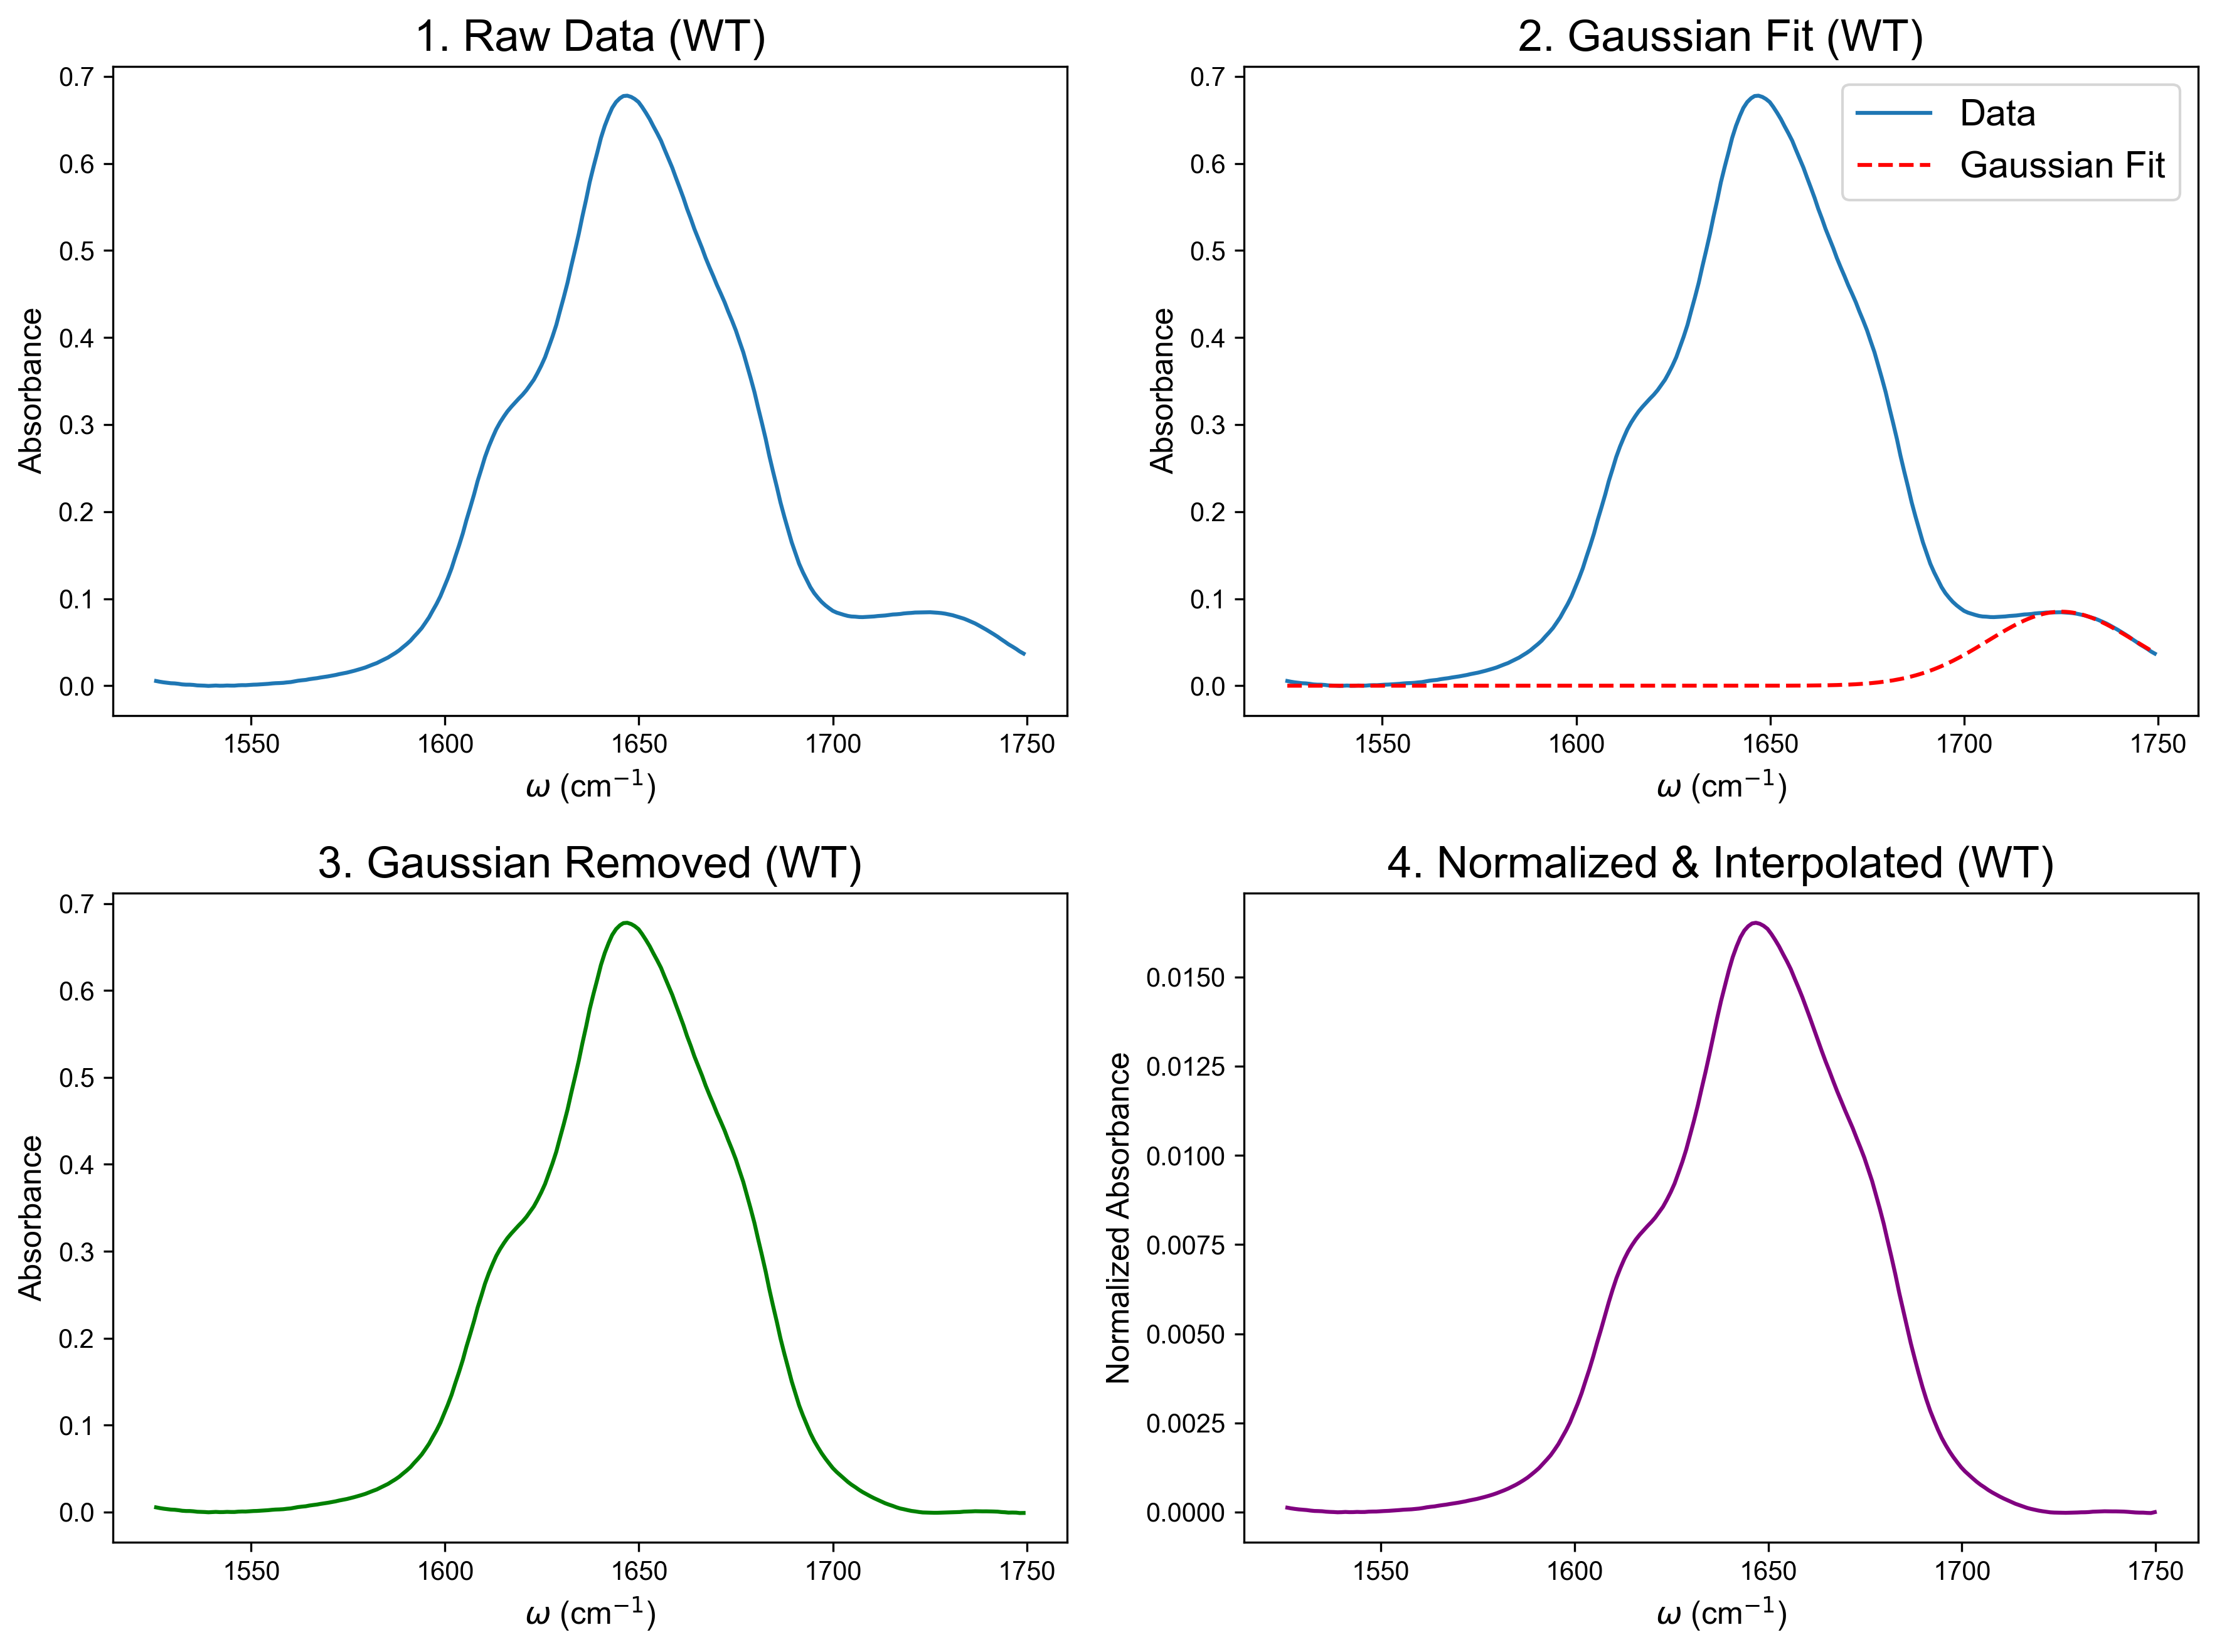

 Saved processed data to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs/GVGn1_WT_50mgmL_phos_150mM_pH1_basecorr_processed.npy

Processing complete! All results saved to: /project/dinner/ianjefab/papers/202508_ELP/data/exp_data/processed_FTIRs


In [1]:
# =============================================================================
# EXPERIMENTAL FTIR PROCESSING
# =============================================================================
# This script processes FTIR (Fourier Transform Infrared) spectroscopy data by:
# 1. Loading raw CSV files containing wavenumber and absorbance data
# 2. Removing COOH peaks using Gaussian fitting
# 3. Normalizing spectra by their integrated area
# 4. Interpolate to frequency axis of simulated spectra
# =============================================================================

### 2 Aug 2025 ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import trapz
from scipy.signal import find_peaks
from pathlib import Path

# -----------------------------------------------------------------------------
# CONFIGURATION 
# -----------------------------------------------------------------------------

# File paths - where to find and save data
BASE_DIR = Path("/project/dinner/ianjefab/papers/202508_ELP/data")
FTIR_DIR = BASE_DIR / "exp_data" / "raw_FTIRs"          
OUTPUT_DIR = BASE_DIR / "exp_data" / "processed_FTIRs"   
WAXIS_FILE = BASE_DIR / "waxis.txt"                     # Reference wavenumber axis file

# Analysis parameters
PEAK_SEARCH_RANGE = (1700, 1750)  # Where to look for COOH peak (in cm^-1)
REFINED_RANGE = (1525, 1750)      # Final wavenumber range we want to analyze 
INITIAL_SIGMA = 10                # Initial guess for Gaussian width parameter

# Plot appearance settings
PLOT_SETTINGS = {
    'font.family': 'Arial', 
    'font.size': 14, 
    'figure.dpi': 300,
    'axes.labelsize': 12, 
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10
}

# -----------------------------------------------------------------------------
# DATA LOADING 
# -----------------------------------------------------------------------------

def load_wavenumber_axis():
    """
    Load and filter wavenumber axis to simulated frequency axis
    Returns:
        wavenumbers: 1D array of wavenumbers in refined range, Shape: (225,)
    """
    # Load the full wavenumber axis from file
    waxis = np.loadtxt(WAXIS_FILE) 
    mask = (waxis >= REFINED_RANGE[0]) & (waxis <= REFINED_RANGE[1])
    return waxis[mask]  

def load_ftir_data(csv_path):
    """
    Loads experimental FTIR data from a CSV file with two columns: wavenumber and absorbance.
    Args:
        csv_path: Path to the CSV file
    Returns:
        wavenumbers: 1D array of wavenumbers (cm⁻¹)
        absorbances: 1D array of absorbance values
    """
    df = pd.read_csv(csv_path)
    wavenumbers = df.iloc[:, 0].values  # First column: wavenumbers
    absorbances = df.iloc[:, 1].values  # Second column: absorbances
    return wavenumbers, absorbances

# -----------------------------------------------------------------------------
# SPECTRAL PROCESSING FUNCTIONS
# -----------------------------------------------------------------------------

def fit_and_subtract_gaussian(x, y):
    """
    Finds the COOH peak in the spectrum and removes it by fitting a Gaussian. 
    The COOH peak typically appears around 1720 cm⁻¹ and is not included
    in the amide I Hamiltonian, so we remove it.
    
    Args:
        x: 1D array of wavenumbers, shape: (n_points,)
        y: 1D array of absorbances, shape: (n_points,)
    Returns:
        gauss_fit: The fitted Gaussian curve, shape: (n_points,)
        y_corrected: Original data with Gaussian subtracted, shape: (n_points,)
    """
    # Extract just the region where we expect the COOH peak
    mask = (x >= PEAK_SEARCH_RANGE[0]) & (x <= PEAK_SEARCH_RANGE[1])
    x_peak_region = x[mask]  
    y_peak_region = y[mask]  
    
    if y_peak_region.size > 0:
        # Find all peaks in this region
        peaks, _ = find_peaks(y_peak_region)  # peaks shape: (n_peaks,)
        
        if peaks.size > 0:
            # Find the highest peak (this should be the COOH peak)
            highest_peak_idx = peaks[np.argmax(y_peak_region[peaks])]
            peak_position = x_peak_region[highest_peak_idx]
            peak_amplitude = y_peak_region[highest_peak_idx]
            
            # Define Gaussian function centered at the peak position
            def gaussian(x_, A, sigma):
                return A * np.exp(-(x_ - peak_position)**2 / (2 * sigma**2))
            
            try:
                # Fit Gaussian only to the right side of the peak (blue edge)
                # This helps avoid fitting to overlapping peaks on the red side
                fit_mask = x >= peak_position
                x_fit = x[fit_mask]  # Shape: (n_fit_points,)
                y_fit = y[fit_mask]  # Shape: (n_fit_points,)
                
                # Perform the fit
                params, _ = curve_fit(gaussian, x_fit, y_fit, 
                                    p0=[peak_amplitude, INITIAL_SIGMA])
                # Generate the full Gaussian curve
                gauss_fit = gaussian(x, *params)  # Shape: (n_points,)
                # Subtract Gaussian from original data
                y_corrected = y - gauss_fit  # Shape: (n_points,)
                
                return gauss_fit, y_corrected
                
            except RuntimeError:
                # If fitting fails, return original data unchanged
                print("  WARNING: Gaussian fitting failed, skipping COOH removal")
                pass
    
    # If no peak found or fitting failed, return zeros for Gaussian and original data
    return np.zeros_like(y), y

def normalize_spectrum(x_data, y_data, waxis_refined):
    """
    Interpolates spectrum to the common wavenumber axis and normalizes by area.    
    Args:
        x_data: Original wavenumbers, Shape: (n_original,)
        y_data: Original absorbances, Shape: (n_original,)
        waxis_refined: Target wavenumber axis, Shape: (225,)
        
    Returns:
        y_normalized: Interpolated and normalized spectrum, Shape: (225,)
    """
    # Interpolate data to the common wavenumber axis
    y_interp = np.interp(waxis_refined, x_data, y_data, 
                        left=0, right=0)  # Shape: (225,)
    # Calculate area under the curve using trapezoidal integration
    area = trapz(y_interp, waxis_refined)  
    y_normalized = y_interp / area
        
    return y_normalized

# -----------------------------------------------------------------------------
# VISUALIZATION FUNCTIONS
# -----------------------------------------------------------------------------

def create_processing_plot(isotope_name, x_data, y_raw, fitted_curve, 
                          y_removed, waxis_refined, y_normalized):
    """
    Creates a 2x2 diagnostic plot showing each step of the processing pipeline.
    This helps verify that each processing step is working correctly.
    
    All input arrays have shapes:
        x_data: (n_filtered,)
        y_raw: (n_filtered,)
        fitted_curve: (n_filtered,)
        y_removed: (n_filtered,)
        waxis_refined: (225,)
        y_normalized: (225,)
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    
    # Top left: Raw filtered data
    axes[0, 0].plot(x_data, y_raw)
    axes[0, 0].set(title=f'1. Raw Data ({isotope_name})', 
                   xlabel=r'$\omega$ (cm$^{-1}$)', 
                   ylabel='Absorbance')
    
    # Top right: Data with Gaussian fit overlay
    axes[0, 1].plot(x_data, y_raw, label='Data')
    axes[0, 1].plot(x_data, fitted_curve, color='red', ls='--', 
                    label='Gaussian Fit')
    axes[0, 1].set(title=f'2. Gaussian Fit ({isotope_name})', 
                   xlabel=r'$\omega$ (cm$^{-1}$)', 
                   ylabel='Absorbance')
    axes[0, 1].legend()
    
    # Bottom left: Data after Gaussian removal
    axes[1, 0].plot(x_data, y_removed, color='green')
    axes[1, 0].set(title=f'3. Gaussian Removed ({isotope_name})', 
                   xlabel=r'$\omega$ (cm$^{-1}$)', 
                   ylabel='Absorbance')
    
    # Bottom right: Final normalized spectrum
    axes[1, 1].plot(waxis_refined, y_normalized, color='purple')
    axes[1, 1].set(title=f'4. Normalized & Interpolated ({isotope_name})', 
                   xlabel=r'$\omega$ (cm$^{-1}$)', 
                   ylabel='Normalized Absorbance')
    
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# MAIN PROCESSING PIPELINE
# -----------------------------------------------------------------------------

def process_single_file(filepath, waxis_refined, save_output=True):
    """
    Processes a single FTIR file through the complete pipeline.
    
    Args:
        filepath: Path object pointing to the CSV file
        waxis_refined: Common wavenumber axis, Shape: (225,)
        save_output: Whether to save the processed data
    Returns:
        y_norm: Processed spectrum, Shape: (225,)
    """
    # Extract isotope name from filename
    isotope_name = filepath.stem.split('_')[1].replace('dag', '+')
    print(f"\n--- Processing: {filepath.name} ({isotope_name}) ---")
    
    # Step 1: Load the raw data from CSV
    waxis_raw, ftir_raw = load_ftir_data(filepath)
    print(f"  Loaded data: {len(waxis_raw)} points")
    
    # Step 2: Filter to our range of interest
    mask = (waxis_raw >= REFINED_RANGE[0]) & (waxis_raw <= REFINED_RANGE[1])
    x_filt = waxis_raw[mask]  # Shape: (n_filtered,)
    y_filt = ftir_raw[mask]   # Shape: (n_filtered,)
    print(f"  After filtering: {len(x_filt)} points in range {REFINED_RANGE}")
    
    # Step 3: Find and remove COOH peak
    gauss_fit, y_corr = fit_and_subtract_gaussian(x_filt, y_filt)
    print(f"  COOH peak removal complete")
    
    # Step 4: Interpolate to common axis and normalize
    y_norm = normalize_spectrum(x_filt, y_corr, waxis_refined)
    print(f"  Normalized to {len(waxis_refined)} points")
    
    # Step 5: Create diagnostic plots
    create_processing_plot(isotope_name, x_filt, y_filt, gauss_fit, 
                          y_corr, waxis_refined, y_norm)
    
    # Step 6: Save processed data as numpy array
    if save_output:
        output_filename = OUTPUT_DIR / f"{filepath.stem}_processed.npy"
        np.save(output_filename, y_norm)
        print(f" Saved processed data to: {output_filename}")
    
    return y_norm

def main():
    """
    Main function that finds and processes all FTIR files in the input directory.
    """
    # Apply plot settings
    plt.rcParams.update(PLOT_SETTINGS)
    
    # Create output directory if it doesn't exist
    OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
    
    # Load the common wavenumber axis
    waxis_refined = load_wavenumber_axis()
    print(f"Loaded reference wavenumber axis: {len(waxis_refined)} points")
    print(f"Wavenumber range: {waxis_refined[0]:.1f} to {waxis_refined[-1]:.1f} cm⁻¹")
    
    # Find all CSV files in the input directory
    csv_files = list(FTIR_DIR.glob("*.csv")) + list(FTIR_DIR.glob("*.CSV"))
    
    if not csv_files:
        print(f"No CSV files found in {FTIR_DIR}")
        return
    
    print(f"\nFound {len(csv_files)} CSV files to process")
    
    # Process each file
    for filepath in sorted(csv_files):
        try:
            process_single_file(filepath, waxis_refined, save_output=True)
        except Exception as e:
            print(f"ERROR processing {filepath.name}: {e}")
    
    print(f"\n{'='*60}")
    print(f"Processing complete! All results saved to: {OUTPUT_DIR}")
    print(f"{'='*60}")

# RUN

if __name__ == "__main__":
    main()